In [ ]:

from scipy.stats.mstats import zscore
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import matplotlib as mpl
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import seaborn as sns
import datetime as dt
from datetime import datetime,tzinfo
import scipy, json, csv, time, pytz
from pytz import timezone
import numpy as np
import pandas as pd
seed = 135
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import os


In [ ]:
import pandas as pd

# Load your two datasets
blocks_dataset = pd.read_csv("/content/bq-results-20231009-162623-1696868798299.csv")
transactions_dataset = pd.read_csv("/content/bq-results-20231009-161957-1696868430304.csv")



In [ ]:
import pandas as pd

# Load your two datasets
blocks_dataset = pd.read_csv("/content/bq-results-20231009-161957-1696868430304.csv")
transactions_dataset = pd.read_csv("/content/bq-results-20231009-162623-1696868798299.csv")

# You can set the Date column to datetime if it's not already in the correct format
blocks_dataset['Date'] = pd.to_datetime(blocks_dataset['Date'])
transactions_dataset['Date'] = pd.to_datetime(transactions_dataset['Date'])

# Now you can perform your data manipulation as before




df_1 = blocks_dataset
df_2 = transactions_dataset

df_2["Output_Satoshis"] = df_2["Output_Satoshis"].apply(lambda x: float(x/100000000))


In [ ]:
df_1.head()

Date  Transactions
0 2016-08-12           149
1 2016-08-13           163
2 2016-08-14           163
3 2016-08-15           146
4 2016-08-16           135

In [ ]:
df_1.tail

<bound method NDFrame.tail of           Date  Transactions
0   2016-08-12           149
1   2016-08-13           163
2   2016-08-14           163
3   2016-08-15           146
4   2016-08-16           135
..         ...           ...
755 2018-09-06           150
756 2018-09-07           152
757 2018-09-08           150
758 2018-09-09           163
759 2018-09-10            74

[760 rows x 2 columns]>

In [ ]:
df_2.head()

Date  Blocks  Output_Satoshis
0 2016-08-12  571788     1.924492e+06
1 2016-08-13  537632     2.049093e+06
2 2016-08-14  533825     1.716569e+06
3 2016-08-15  502906     2.077130e+06
4 2016-08-16  610164     2.731958e+06

In [ ]:
# merge the two dataframes
result = pd.merge(df_1,
                 df_2[['Date', 'Blocks', 'Output_Satoshis']],
                 on='Date')
result.head()

Date  Transactions  Blocks  Output_Satoshis
0 2016-08-12           149  571788     1.924492e+06
1 2016-08-13           163  537632     2.049093e+06
2 2016-08-14           163  533825     1.716569e+06
3 2016-08-15           146  502906     2.077130e+06
4 2016-08-16           135  610164     2.731958e+06

In [ ]:
# Number of records
len(result)

760

In [ ]:
# get the overview of our data
result.describe()

Transactions        Blocks  Output_Satoshis
count    760.000000  7.600000e+02     7.600000e+02
mean     152.388158  6.563773e+05     2.014011e+06
std       17.481648  1.457100e+05     1.057827e+06
min        2.000000  1.548900e+04     1.922581e+04
25%      142.000000  5.596760e+05     1.278973e+06
50%      153.000000  6.378340e+05     1.853705e+06
75%      164.000000  7.279940e+05     2.484635e+06
max      197.000000  1.264802e+06     9.838137e+06

<Axes: xlabel='Blocks', ylabel='Density'>

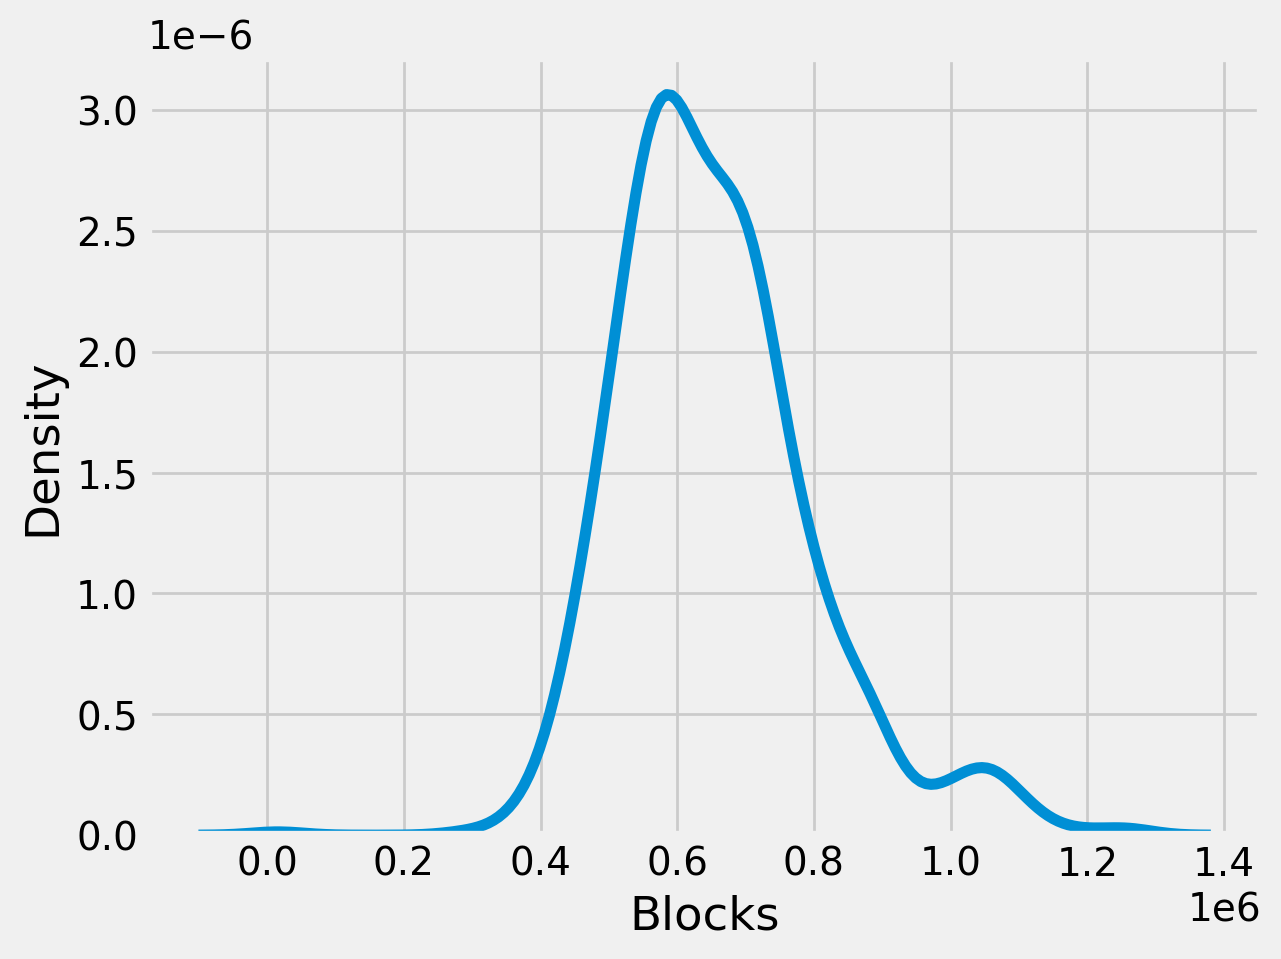

In [ ]:
sns.kdeplot(result['Blocks'])

<Axes: xlabel='Transactions', ylabel='Density'>

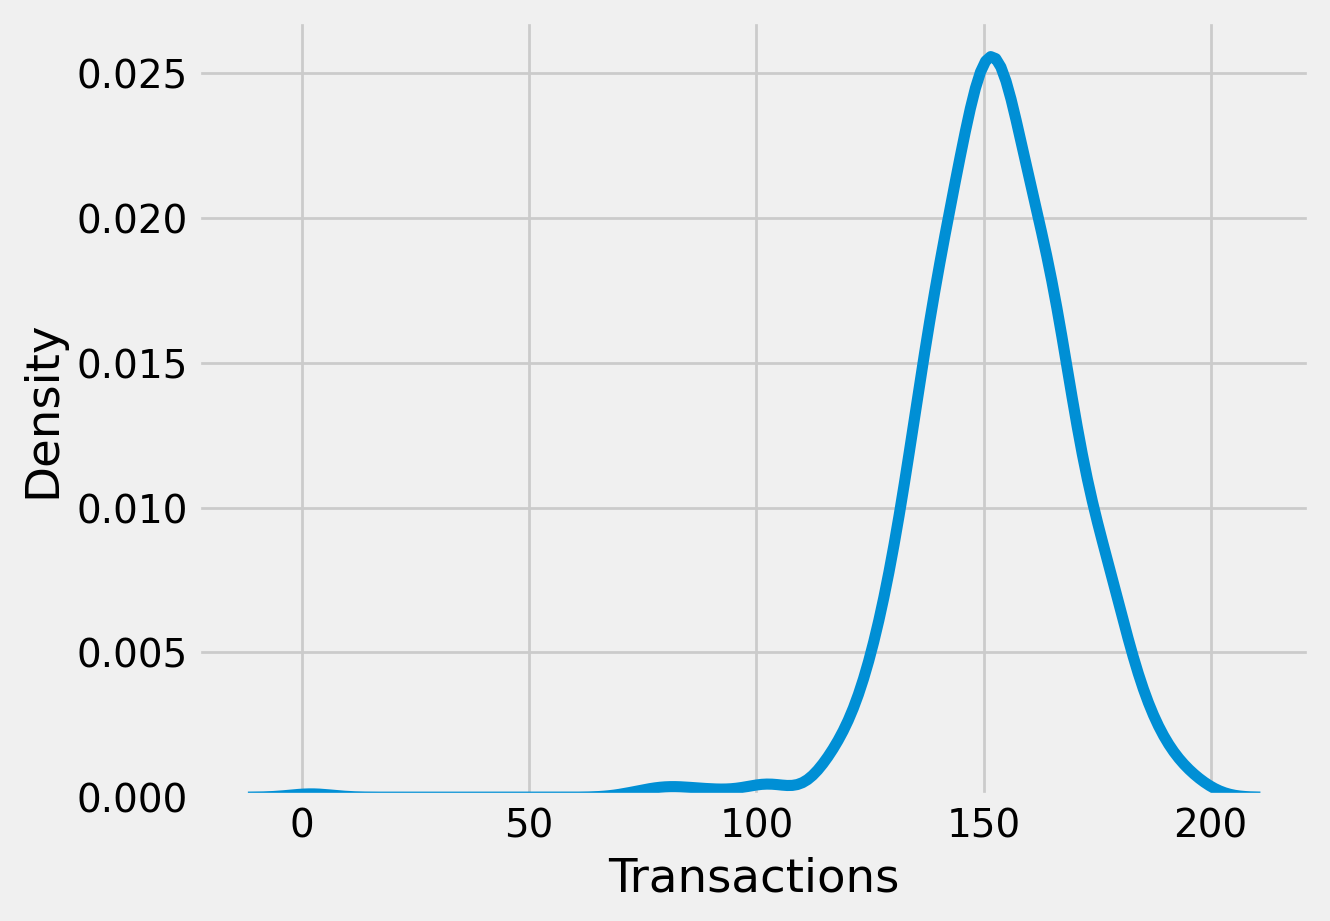

In [ ]:
sns.kdeplot(result['Transactions'])

<Axes: xlabel='Output_Satoshis', ylabel='Density'>

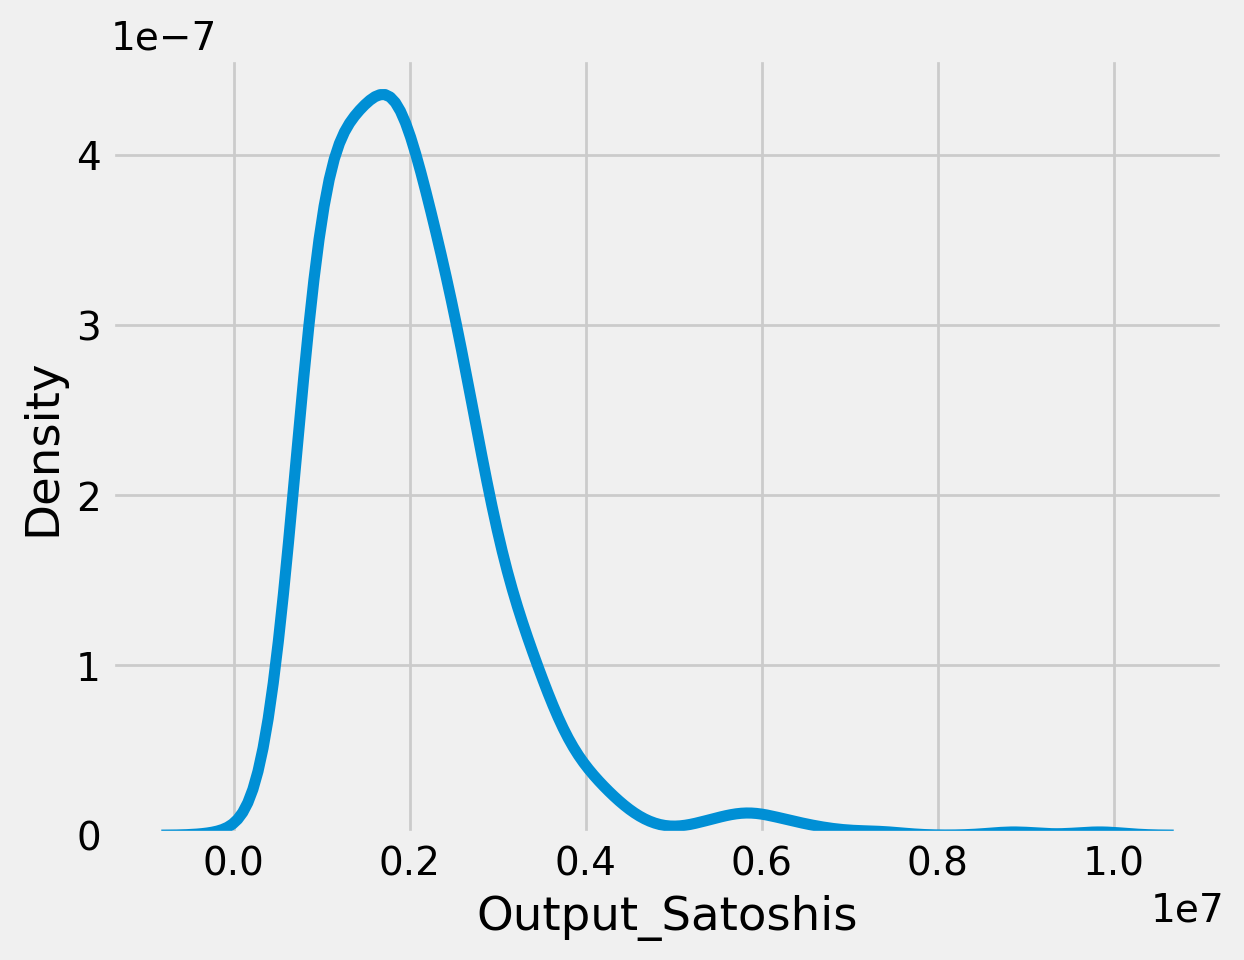

In [ ]:
sns.kdeplot(result['Output_Satoshis'])

<ipython-input-13-2402c354b9e7>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.lineplot(x='Date', y='Transactions', data=result, palette='Blues_d')


Text(0.5, 1.0, 'Transactions per day')

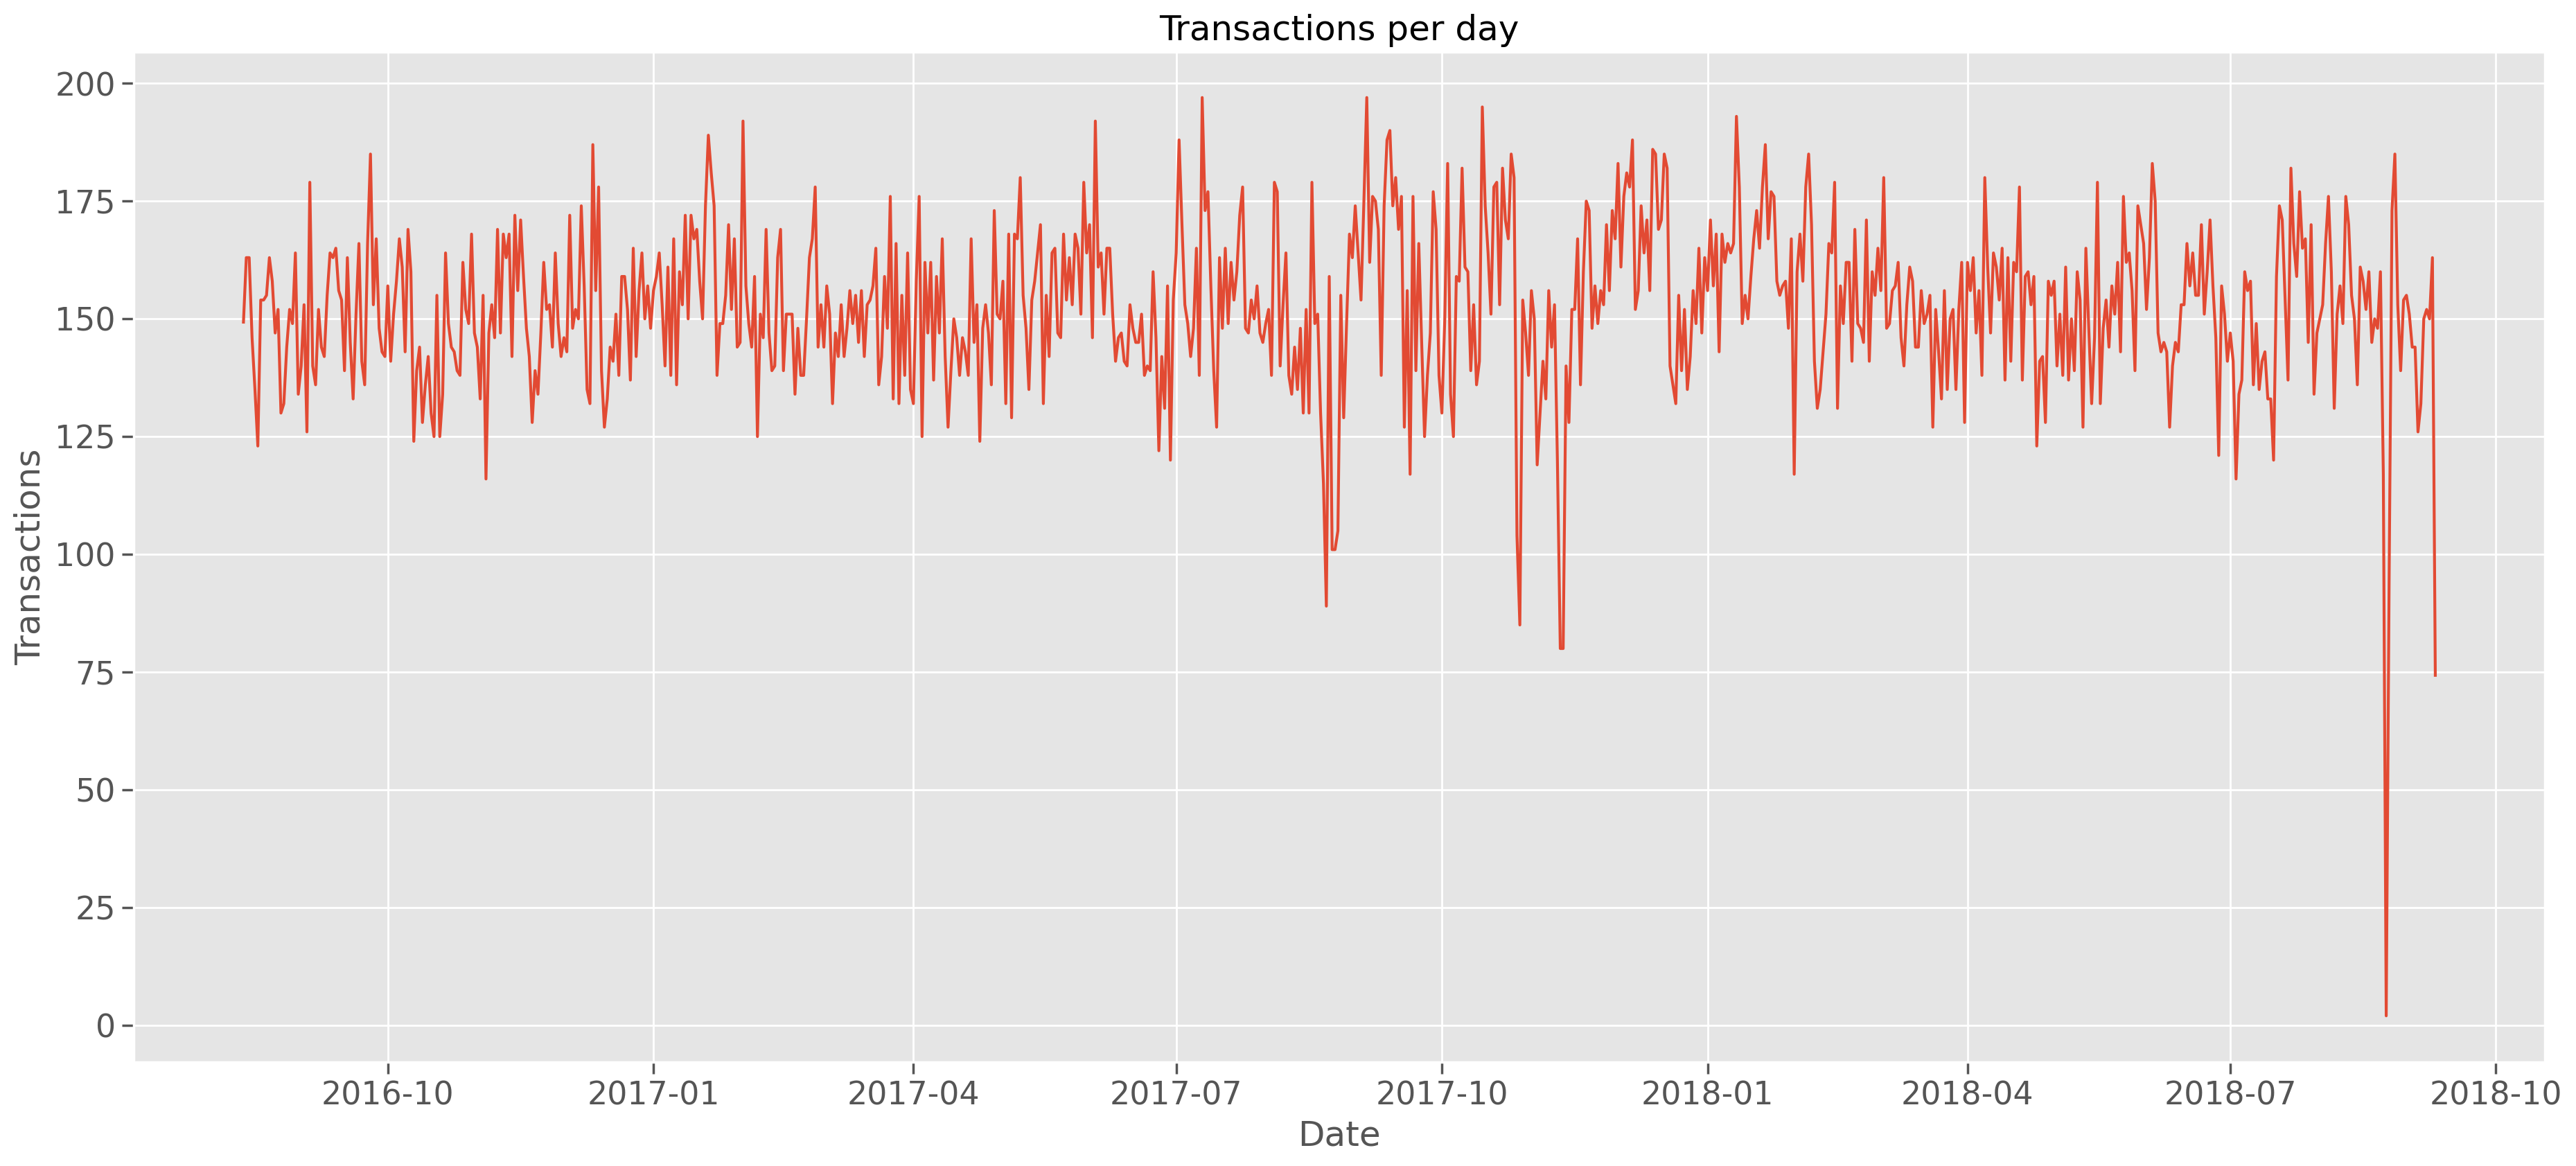

In [ ]:
%matplotlib inline
plt.style.use('ggplot')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5})

g = plt.subplots(figsize=(20,9))
g = sns.lineplot(x='Date', y='Transactions', data=result, palette='Blues_d')
plt.title('Transactions per day')

In [ ]:
%matplotlib inline
plt.style.use('ggplot')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5})

g = plt.subplots(figsize=(20,9))
g = sns.lineplot(x='Date', y='Blocks', data=result, palette='Blues_d')
plt.title('Blocks per day')

<ipython-input-14-1d9fe3ebddb7>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.lineplot(x='Date', y='Blocks', data=result, palette='Blues_d')


Text(0.5, 1.0, 'Blocks per day')

In [ ]:
g = plt.subplots(figsize=(20,9))
g = sns.lineplot(x='Date', y='Output_Satoshis', data=result, palette='BuGn_r')
plt.title('Sum of all satoshis spent each day')

<ipython-input-15-208c7f7b4c3a>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.lineplot(x='Date', y='Output_Satoshis', data=result, palette='BuGn_r')


Text(0.5, 1.0, 'Sum of all satoshis spent each day')

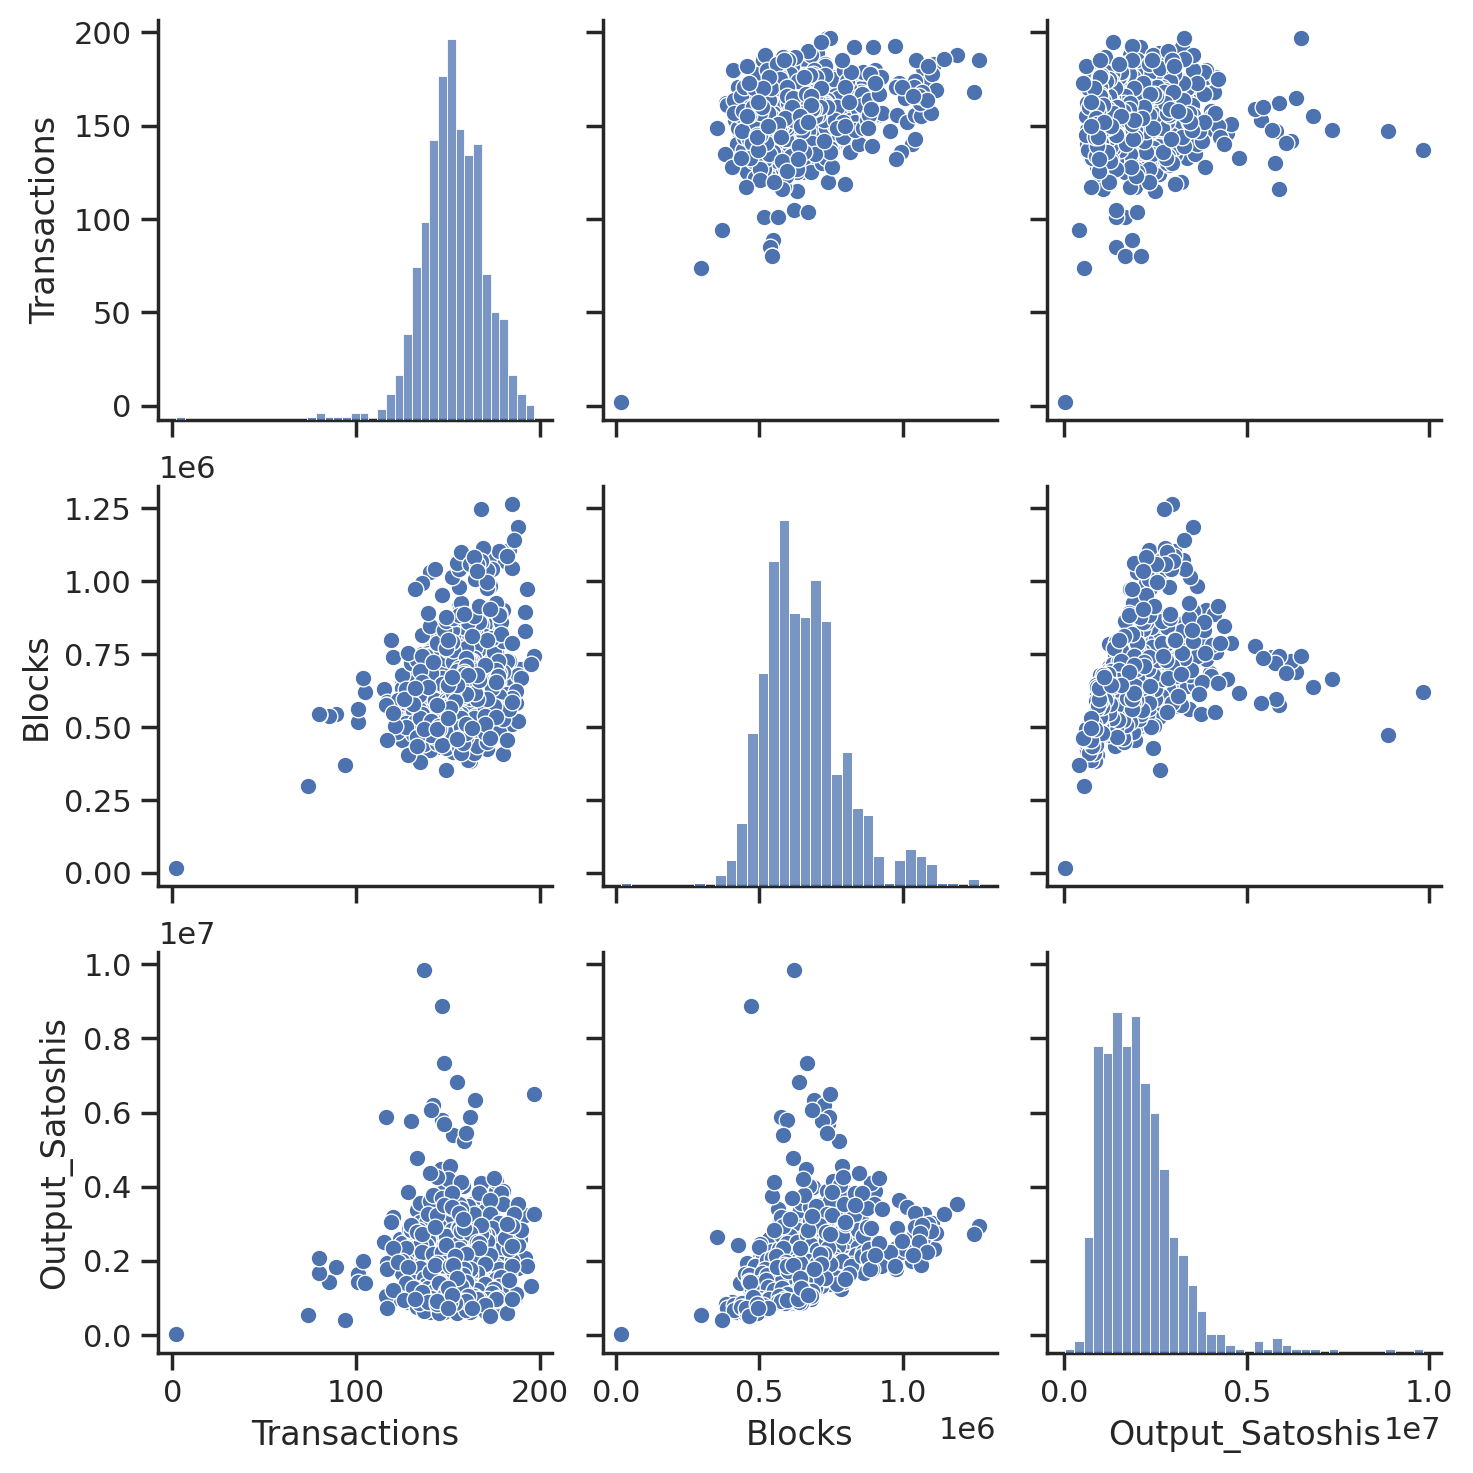

In [ ]:
# check the relation among the features of data
sns.set(style="ticks")
sns.pairplot(result)

In [ ]:
split_row = len(result) - int(0.2 * len(result))
train_data = result.iloc[:split_row]
test_data = result.iloc[split_row:]

In [ ]:
len(train_data)

608

In [ ]:
len(test_data)

152

In [ ]:
train_data.head()
test_data.head()

Date  Transactions  Blocks  Output_Satoshis
608 2018-04-12           154  559118     2.136544e+06
609 2018-04-13           165  620348     1.247341e+06
610 2018-04-14           137  442929     6.930883e+05
611 2018-04-15           163  486658     7.510730e+05
612 2018-04-16           141  526997     1.361858e+06

In [ ]:
chosen_col = 'Transactions'
fig, ax = plt.subplots(1, figsize=(13, 7))
ax.plot(train_data[chosen_col], label='Train', linewidth=2)
ax.plot(test_data[chosen_col], label='Test', linewidth=2)
ax.set_ylabel('Transactions', fontsize=14)
ax.set_title('plot', fontsize=16)
ax.legend(loc='best', fontsize=16)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

datacol = result.iloc[:, 1:2].values
traincol = train_data.iloc[:, 1:2].values
testcol = test_data.iloc[:, 1:2].values

shaped_data = np.reshape(datacol,(-1,1))
train_shaped = np.reshape(traincol, (-1,1))
test_shaped = np.reshape(testcol, (-1,1))

sc = MinMaxScaler(feature_range=(0,1))
sc.fit(shaped_data)

train_scaled_data = sc.transform(shaped_data)
test_scaled_data = sc.transform(test_shaped)
"""
d = data['Transactions']
outliers_fraction=0.05
scaler = StandardScaler()
np_scaled = scaler.fit_transform(d)
d = pd.DataFrame(np_scaled)
from sklearn.preprocessing import MinMaxScaler

datacol = dataset.iloc[:, 7:8].values
traincol = train_data.iloc[:, 7:8].values
testcol = test_data.iloc[:, 7:8].values

shaped_data = np.reshape(datacol, (-1,1))
train_shaped = np.reshape(traincol, (-1,1))
test_shaped = np.reshape(testcol, (-1,1))

sc = MinMaxScaler(feature_range=(0,1))
sc.fit(shaped_data)

train_scaled_data = sc.transform(train_shaped)
test_scaled_data = sc.transform(test_shaped)"""

"\nd = data['Transactions']\noutliers_fraction=0.05\nscaler = StandardScaler()\nnp_scaled = scaler.fit_transform(d)\nd = pd.DataFrame(np_scaled)\nfrom sklearn.preprocessing import MinMaxScaler\n\ndatacol = dataset.iloc[:, 7:8].values\ntraincol = train_data.iloc[:, 7:8].values\ntestcol = test_data.iloc[:, 7:8].values\n\nshaped_data = np.reshape(datacol, (-1,1))\ntrain_shaped = np.reshape(traincol, (-1,1))\ntest_shaped = np.reshape(testcol, (-1,1))\n\nsc = MinMaxScaler(feature_range=(0,1))\nsc.fit(shaped_data)\n\ntrain_scaled_data = sc.transform(train_shaped)\ntest_scaled_data = sc.transform(test_shaped)"

In [ ]:
len(datacol)
len(test_shaped)

152

In [ ]:
X = []
y = []
time_steps = 50

for i in range(time_steps, len(train_data)):
    X.append(train_scaled_data[i-time_steps:i,0])
    y.append(train_scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape

(446, 50, 1)

In [ ]:
X_test.shape

(112, 50, 1)

In [ ]:
y_test.shape

(112,)

In [ ]:

y_train.shape

(446,)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation

model = Sequential()
model.add(LSTM(units=100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('linear'))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1, callbacks=[callback], shuffle=True)

Epoch 1/100
14/14 [==============================] - 4s 82ms/step - loss: 0.1528 - accuracy: 0.0022 - val_loss: 0.0131 - val_accuracy: 0.0089
Epoch 2/100
14/14 [==============================] - 1s 37ms/step - loss: 0.0196 - accuracy: 0.0022 - val_loss: 0.0082 - val_accuracy: 0.0089
Epoch 3/100
14/14 [==============================] - 0s 36ms/step - loss: 0.0121 - accuracy: 0.0022 - val_loss: 0.0087 - val_accuracy: 0.0089
Epoch 4/100
14/14 [==============================] - 1s 38ms/step - loss: 0.0111 - accuracy: 0.0022 - val_loss: 0.0079 - val_accuracy: 0.0089
Epoch 5/100
14/14 [==============================] - 1s 37ms/step - loss: 0.0108 - accuracy: 0.0022 - val_loss: 0.0077 - val_accuracy: 0.0089
Epoch 6/100
14/14 [==============================] - 1s 39ms/step - loss: 0.0101 - accuracy: 0.0022 - val_loss: 0.0078 - val_accuracy: 0.0089
Epoch 7/100
14/14 [==============================] - 1s 38ms/step - loss: 0.0104 - accuracy: 0.0022 - val_loss: 0.0076 - val_accuracy: 0.0089
Epoch 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from keras.metrics import mean_absolute_error

X_testing = []
y_testing = []

for i in range(time_steps, len(test_data)):
    X_testing.append(test_scaled_data[i-time_steps:i,0])
    y_testing.append(test_scaled_data[i, 0])

X_testing, y_testing = np.array(X_testing), np.array(y_testing)
X_testing = np.reshape(X_testing, (X_testing.shape[0], X_testing.shape[1],1))

predicted_trans = model.predict(X_testing)
inv_trans = sc.inverse_transform(predicted_trans)
real_trans = np.reshape(y_testing, (-1,1))
real_trans = sc.inverse_transform(real_trans)

4/4 [==============================] - 1s 11ms/step


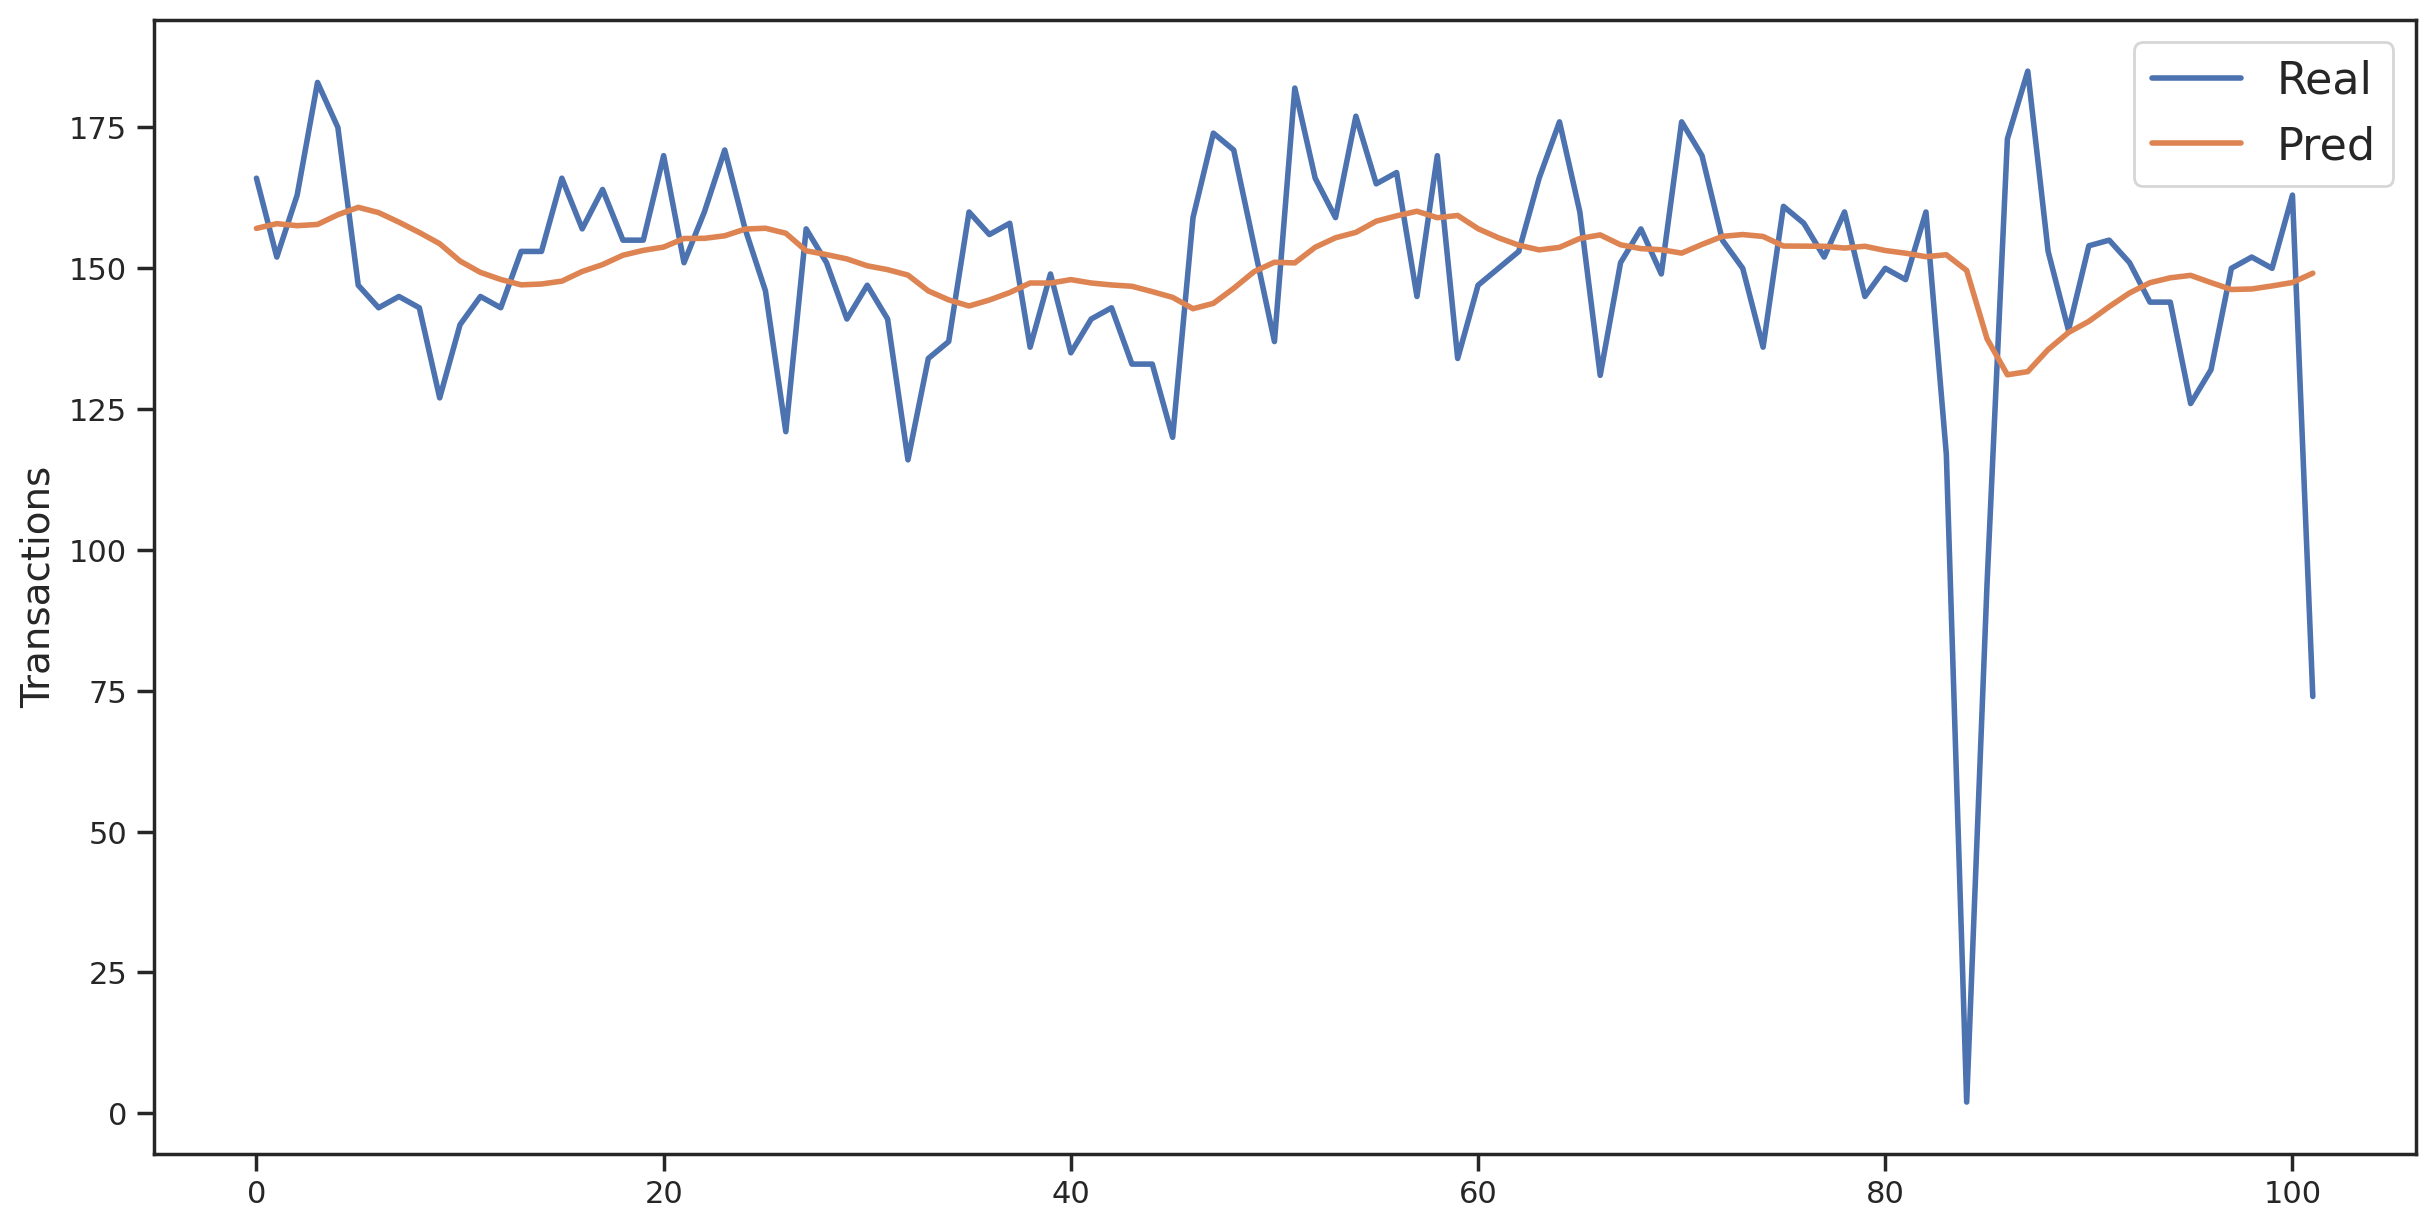

In [ ]:
fig, ax = plt.subplots(1, figsize=(13, 7))
ax.plot(real_trans, label='Real', linewidth=2)
ax.plot(inv_trans, label='Pred', linewidth=2)
ax.set_ylabel('Transactions', fontsize=14)
ax.set_title('', fontsize=16)
ax.legend(loc='best', fontsize=16)

In [ ]:
# select the three most important features (Transactions, Blocks, Output Satoshis) from the data
data = result[['Output_Satoshis','Blocks','Transactions']]
outliers_fraction=0.05
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

# train isolation forest
model =  IsolationForest(contamination=outliers_fraction)
model.fit(data)

IsolationForest(contamination=0.05)

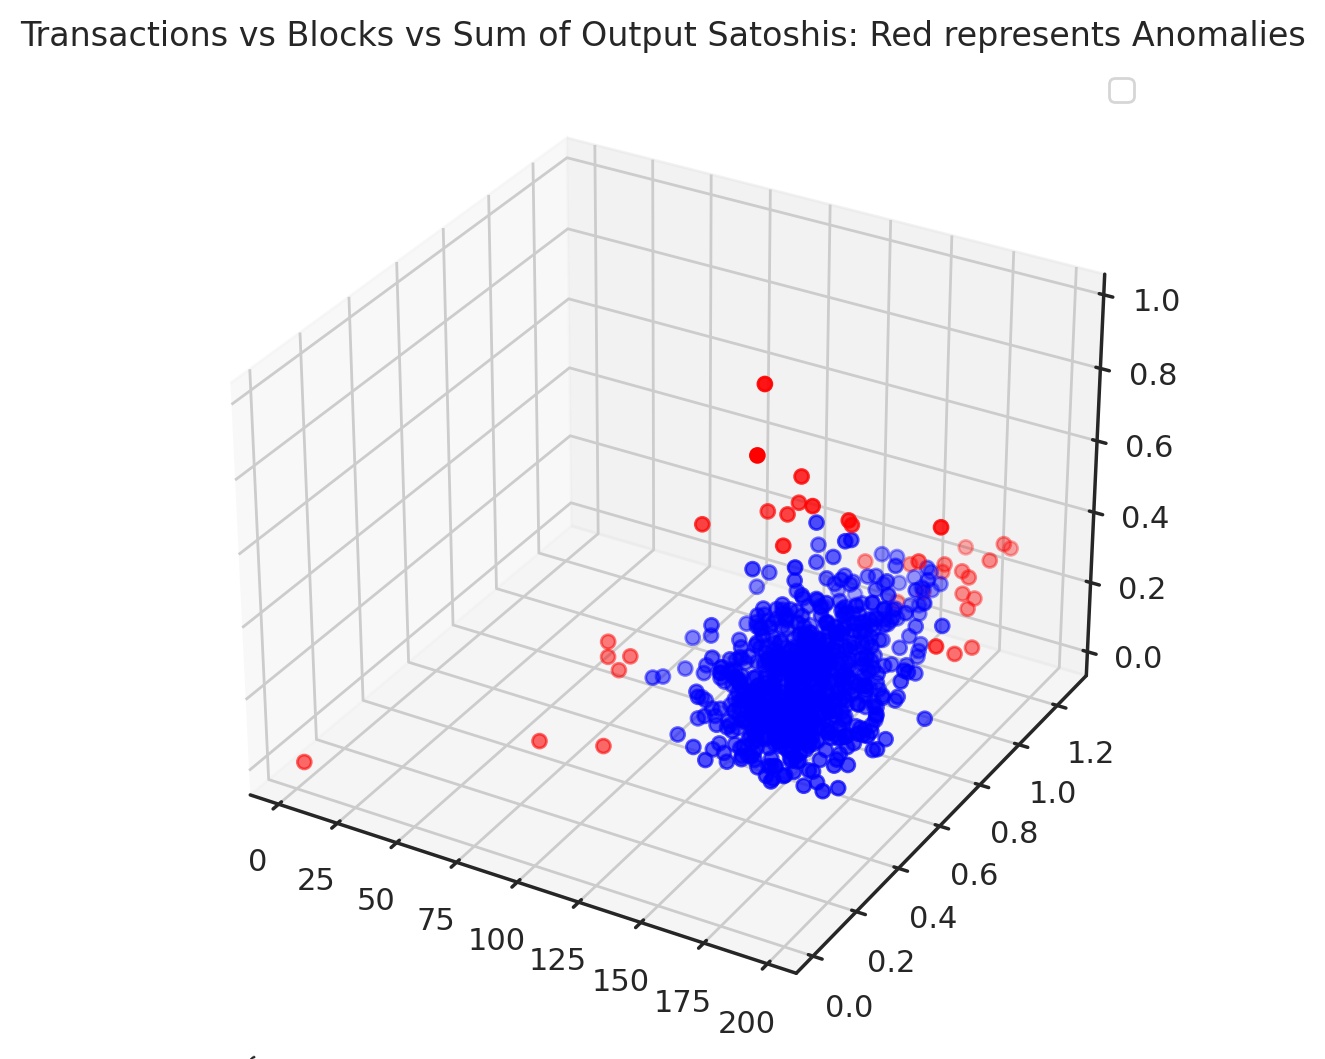

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111,projection='3d')
X = result.iloc[:,1:4].values
colors = np.array(['red', 'blue'])
y_pred = model.fit_predict(data)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=25, color=colors[(y_pred + 1) // 2] )
ax.legend()
#plt.xlabel('Transactions')
#plt.ylabel('Blocks')
#plt.zlabel('Sum of Output Satoshis')
plt.title('Transactions vs Blocks vs Sum of Output Satoshis: Red represents Anomalies')
plt.savefig('IsolationForest_anomaly.png', dpi=1000)

In [ ]:
# create a new column for storing the results of Isolation Forest method
result['anomaly_IsolationForest'] = pd.Series(model.predict(data))
result['anomaly_IsolationForest'] = result['anomaly_IsolationForest'].apply(lambda x: x == -1)
result['anomaly_IsolationForest'] = result['anomaly_IsolationForest'].astype(int)
result['anomaly_IsolationForest'].value_counts()

0    722
1     38
Name: anomaly_IsolationForest, dtype: int64

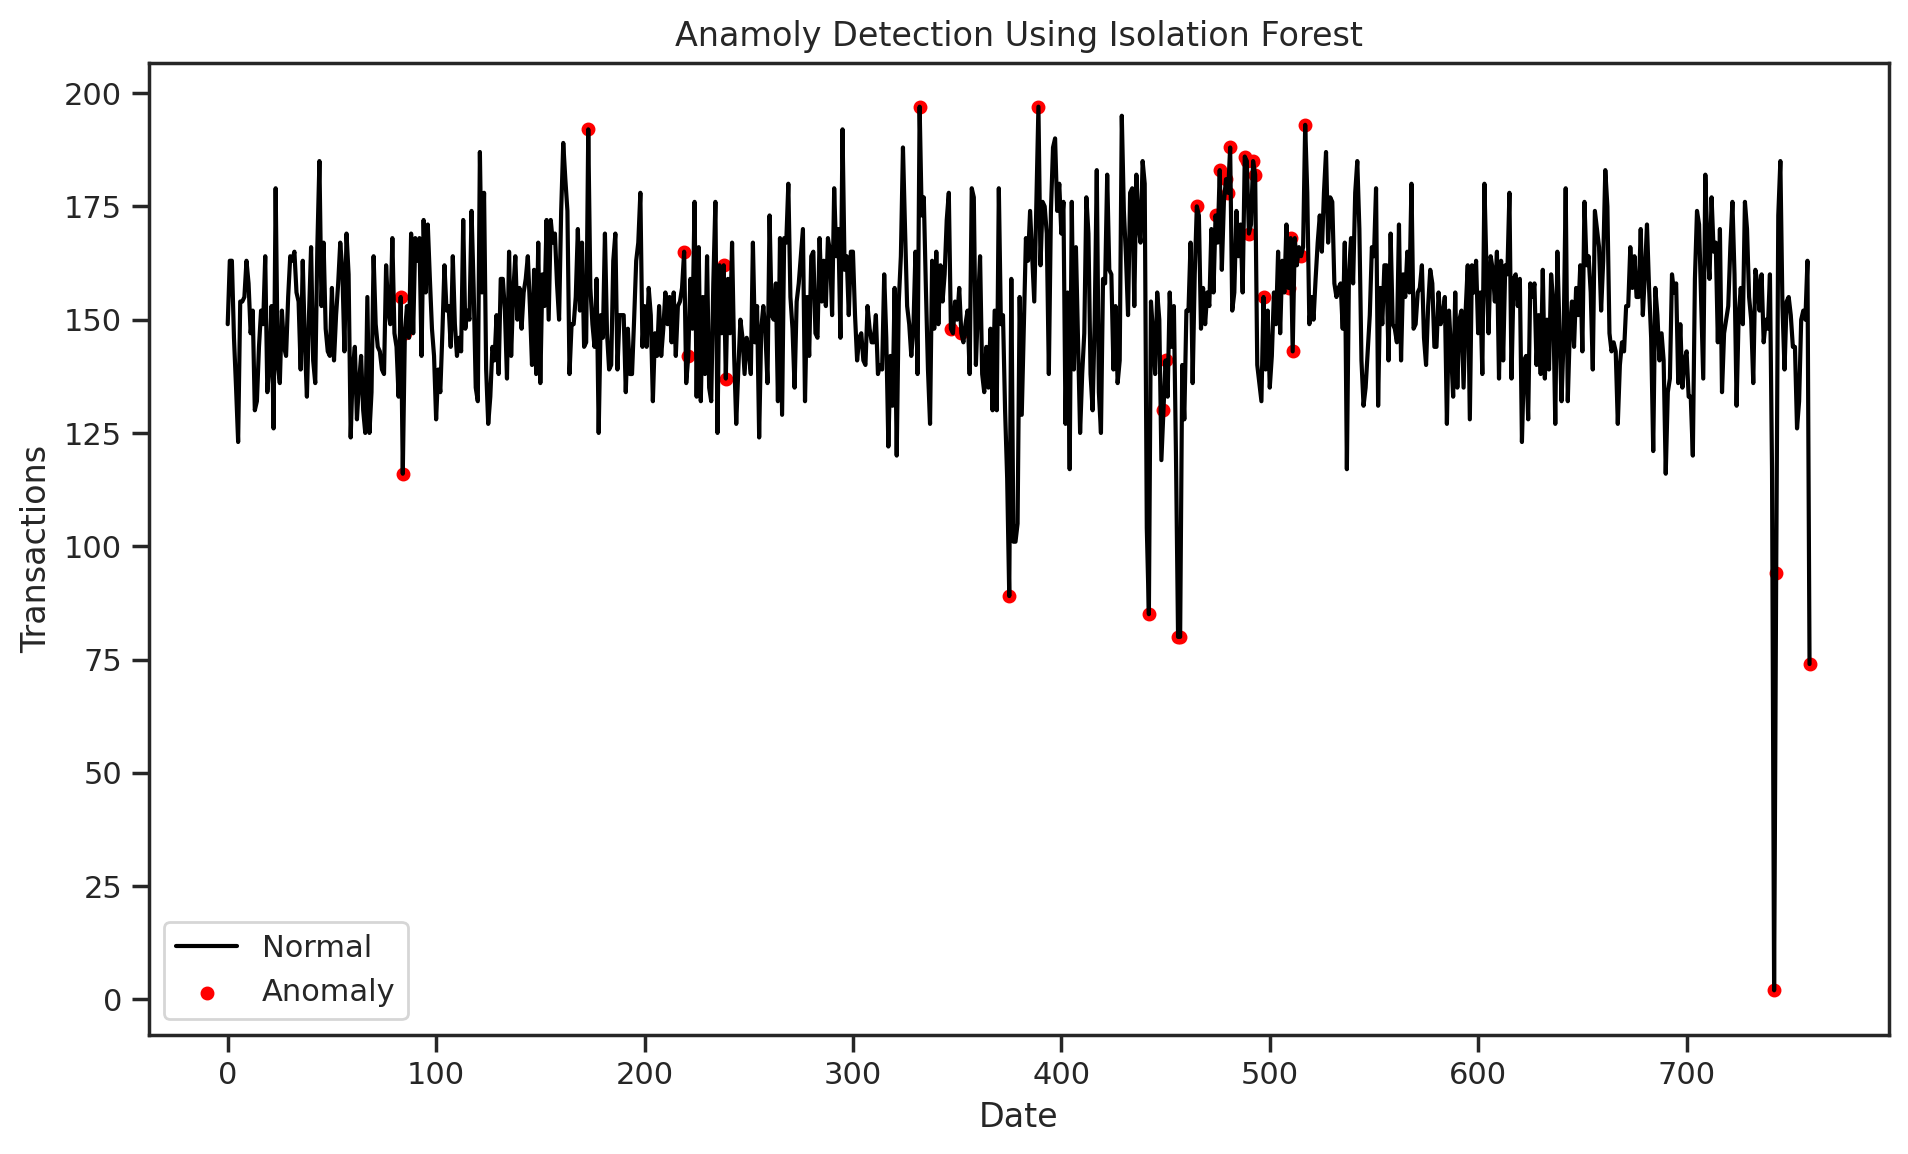

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

#anomaly
a = result.loc[result['anomaly_IsolationForest'] == 1]
ax.plot(result['Transactions'], color='black', label = 'Normal', linewidth=1.5)
ax.scatter(a.index ,a['Transactions'], color='red', label = 'Anomaly', s=16)
plt.legend()
plt.title("Anamoly Detection Using Isolation Forest")
plt.xlabel('Date')
plt.ylabel('Transactions')
plt.savefig('IsolationForest_anomaly_Transactions.png', dpi=1000)
plt.show();

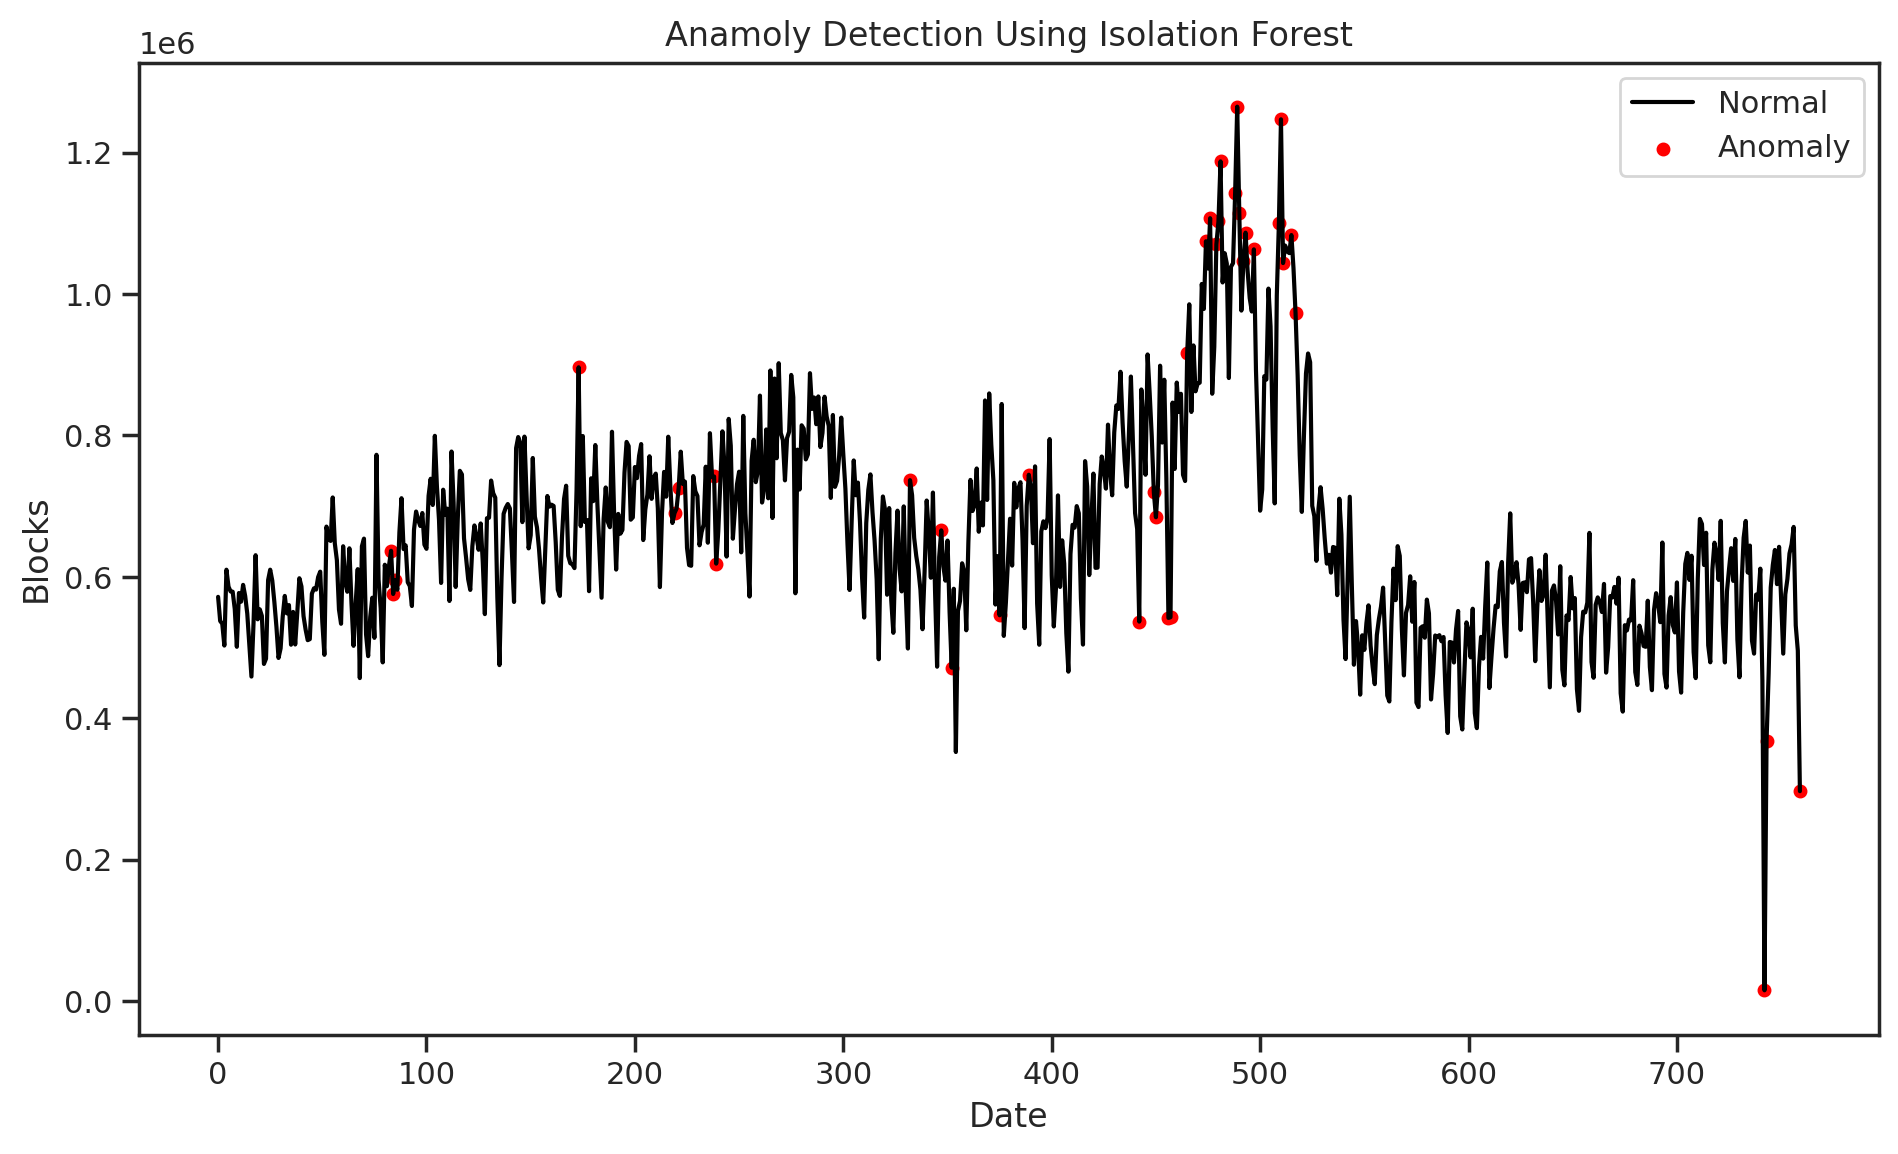

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

#anomaly
a = result.loc[result['anomaly_IsolationForest'] == 1]
ax.plot(result['Blocks'], color='black', label = 'Normal', linewidth=1.5)
ax.scatter(a.index ,a['Blocks'], color='red', label = 'Anomaly', s=16)
plt.legend()
plt.title("Anamoly Detection Using Isolation Forest")
plt.xlabel('Date')
plt.ylabel('Blocks')
plt.savefig('IsolationForest_anomaly_Blocks.png', dpi=1000)
plt.show();


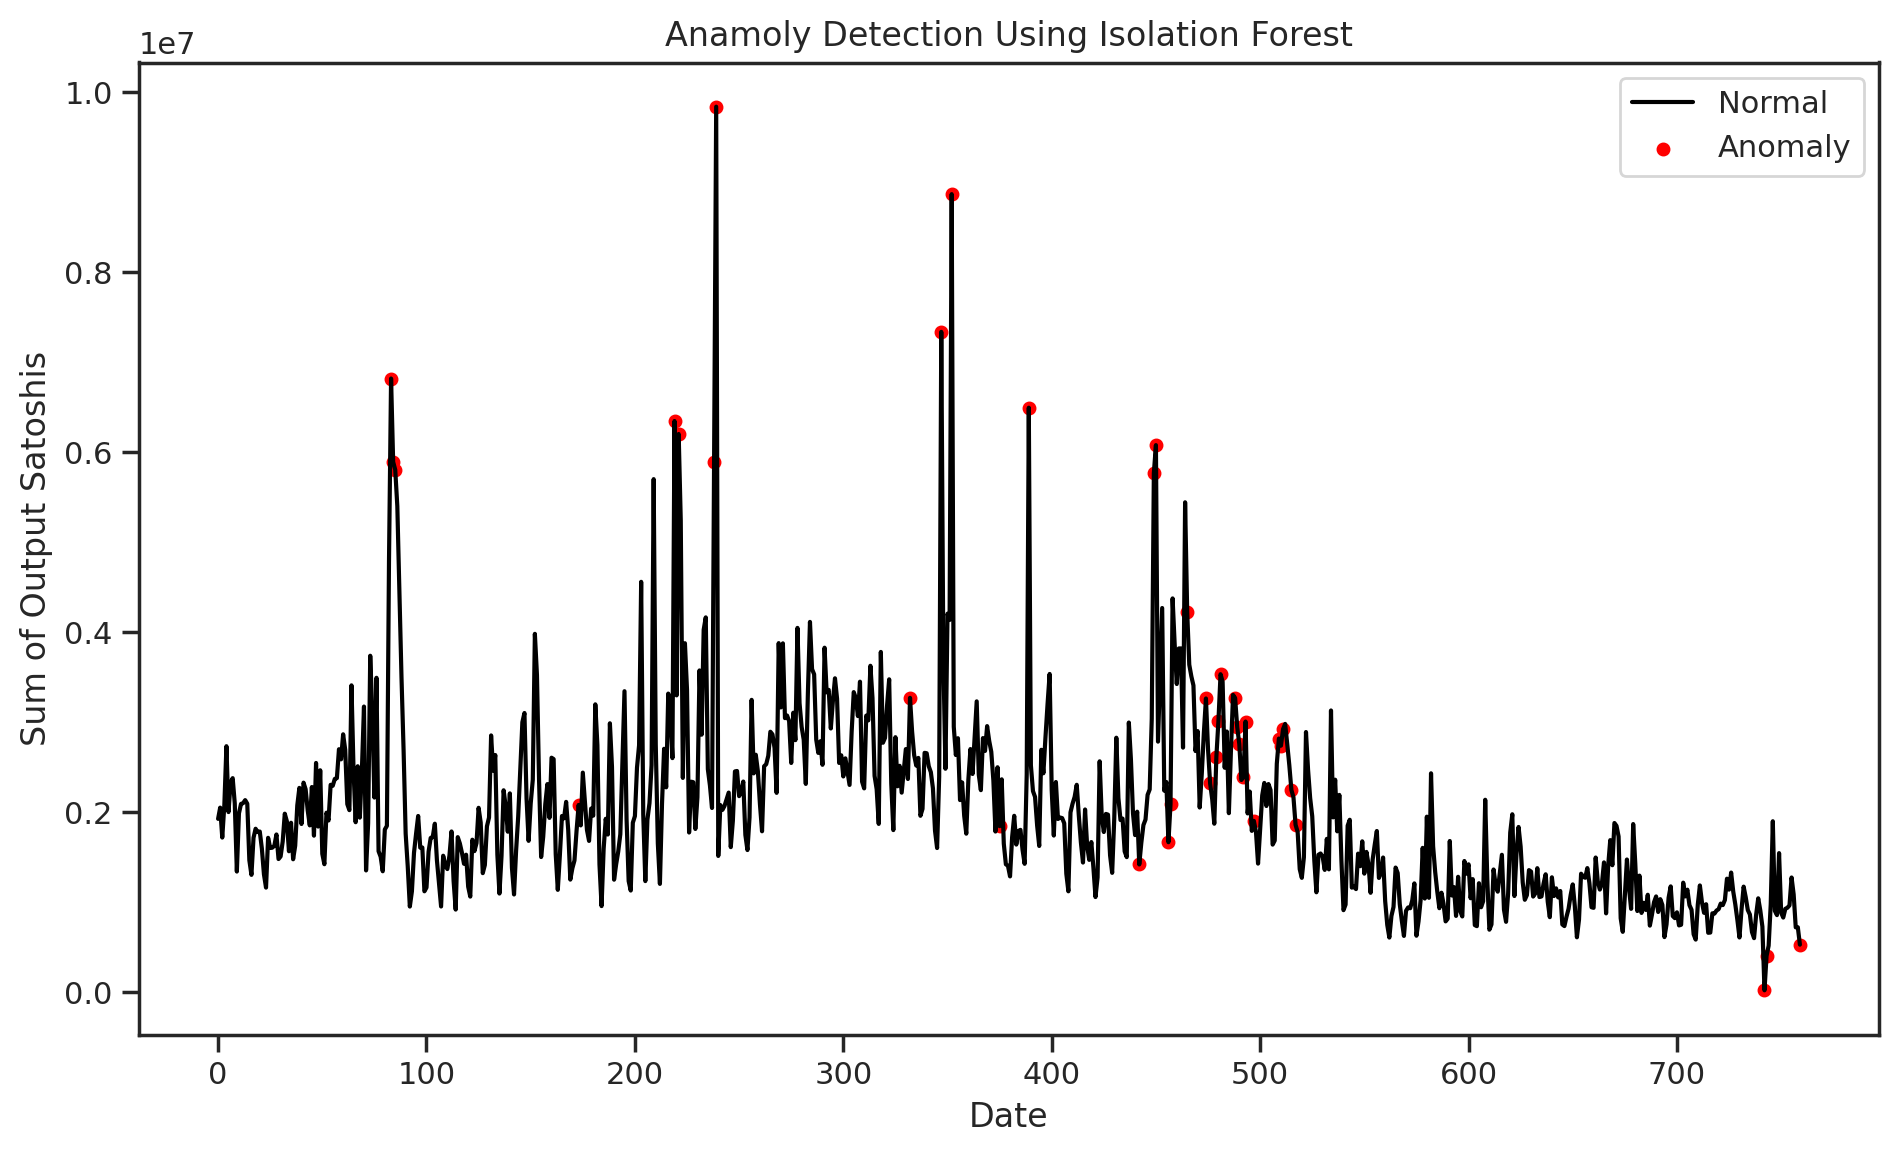

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

#anomaly
a = result.loc[result['anomaly_IsolationForest'] == 1]
ax.plot(result['Output_Satoshis'], color='black', label = 'Normal', linewidth=1.5)
ax.scatter(a.index ,a['Output_Satoshis'], color='red', label = 'Anomaly', s=16)
plt.legend()
plt.title("Anamoly Detection Using Isolation Forest")
plt.xlabel('Date')
plt.ylabel('Sum of Output Satoshis')
plt.savefig('IsolationForest_anomaly_Output_Satoshis.png', dpi=1000)
plt.show();


In [ ]:

def pca_results(good_data, pca):
    # Dimension indexing
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = good_data.keys())
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (10,10))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)


    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

In [ ]:
data_ = data.copy() # make a copy of data with three already selected features
data_ = data_.reset_index(drop=True)

data_[:] = MinMaxScaler().fit_transform(data_[:])
pca = PCA(n_components=2) # we have selected 2 components in PCA for simplicity
pca.fit(data_)
reduced_data = pca.transform(data_)
reduced_data = pd.DataFrame(reduced_data)

num_clusters = range(1, 20)

kmeans = [KMeans(n_clusters=i, random_state=seed).fit(reduced_data) for i in num_clusters]
scores = [kmeans[i].score(reduced_data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(num_clusters, scores, linewidth = 4)
plt.xticks(num_clusters)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Explained Variance       0       1       2
Dimension 1              0.5758 -0.5909 -0.7626 -0.2634
Dimension 2              0.2627  0.6514 -0.2584 -0.7133

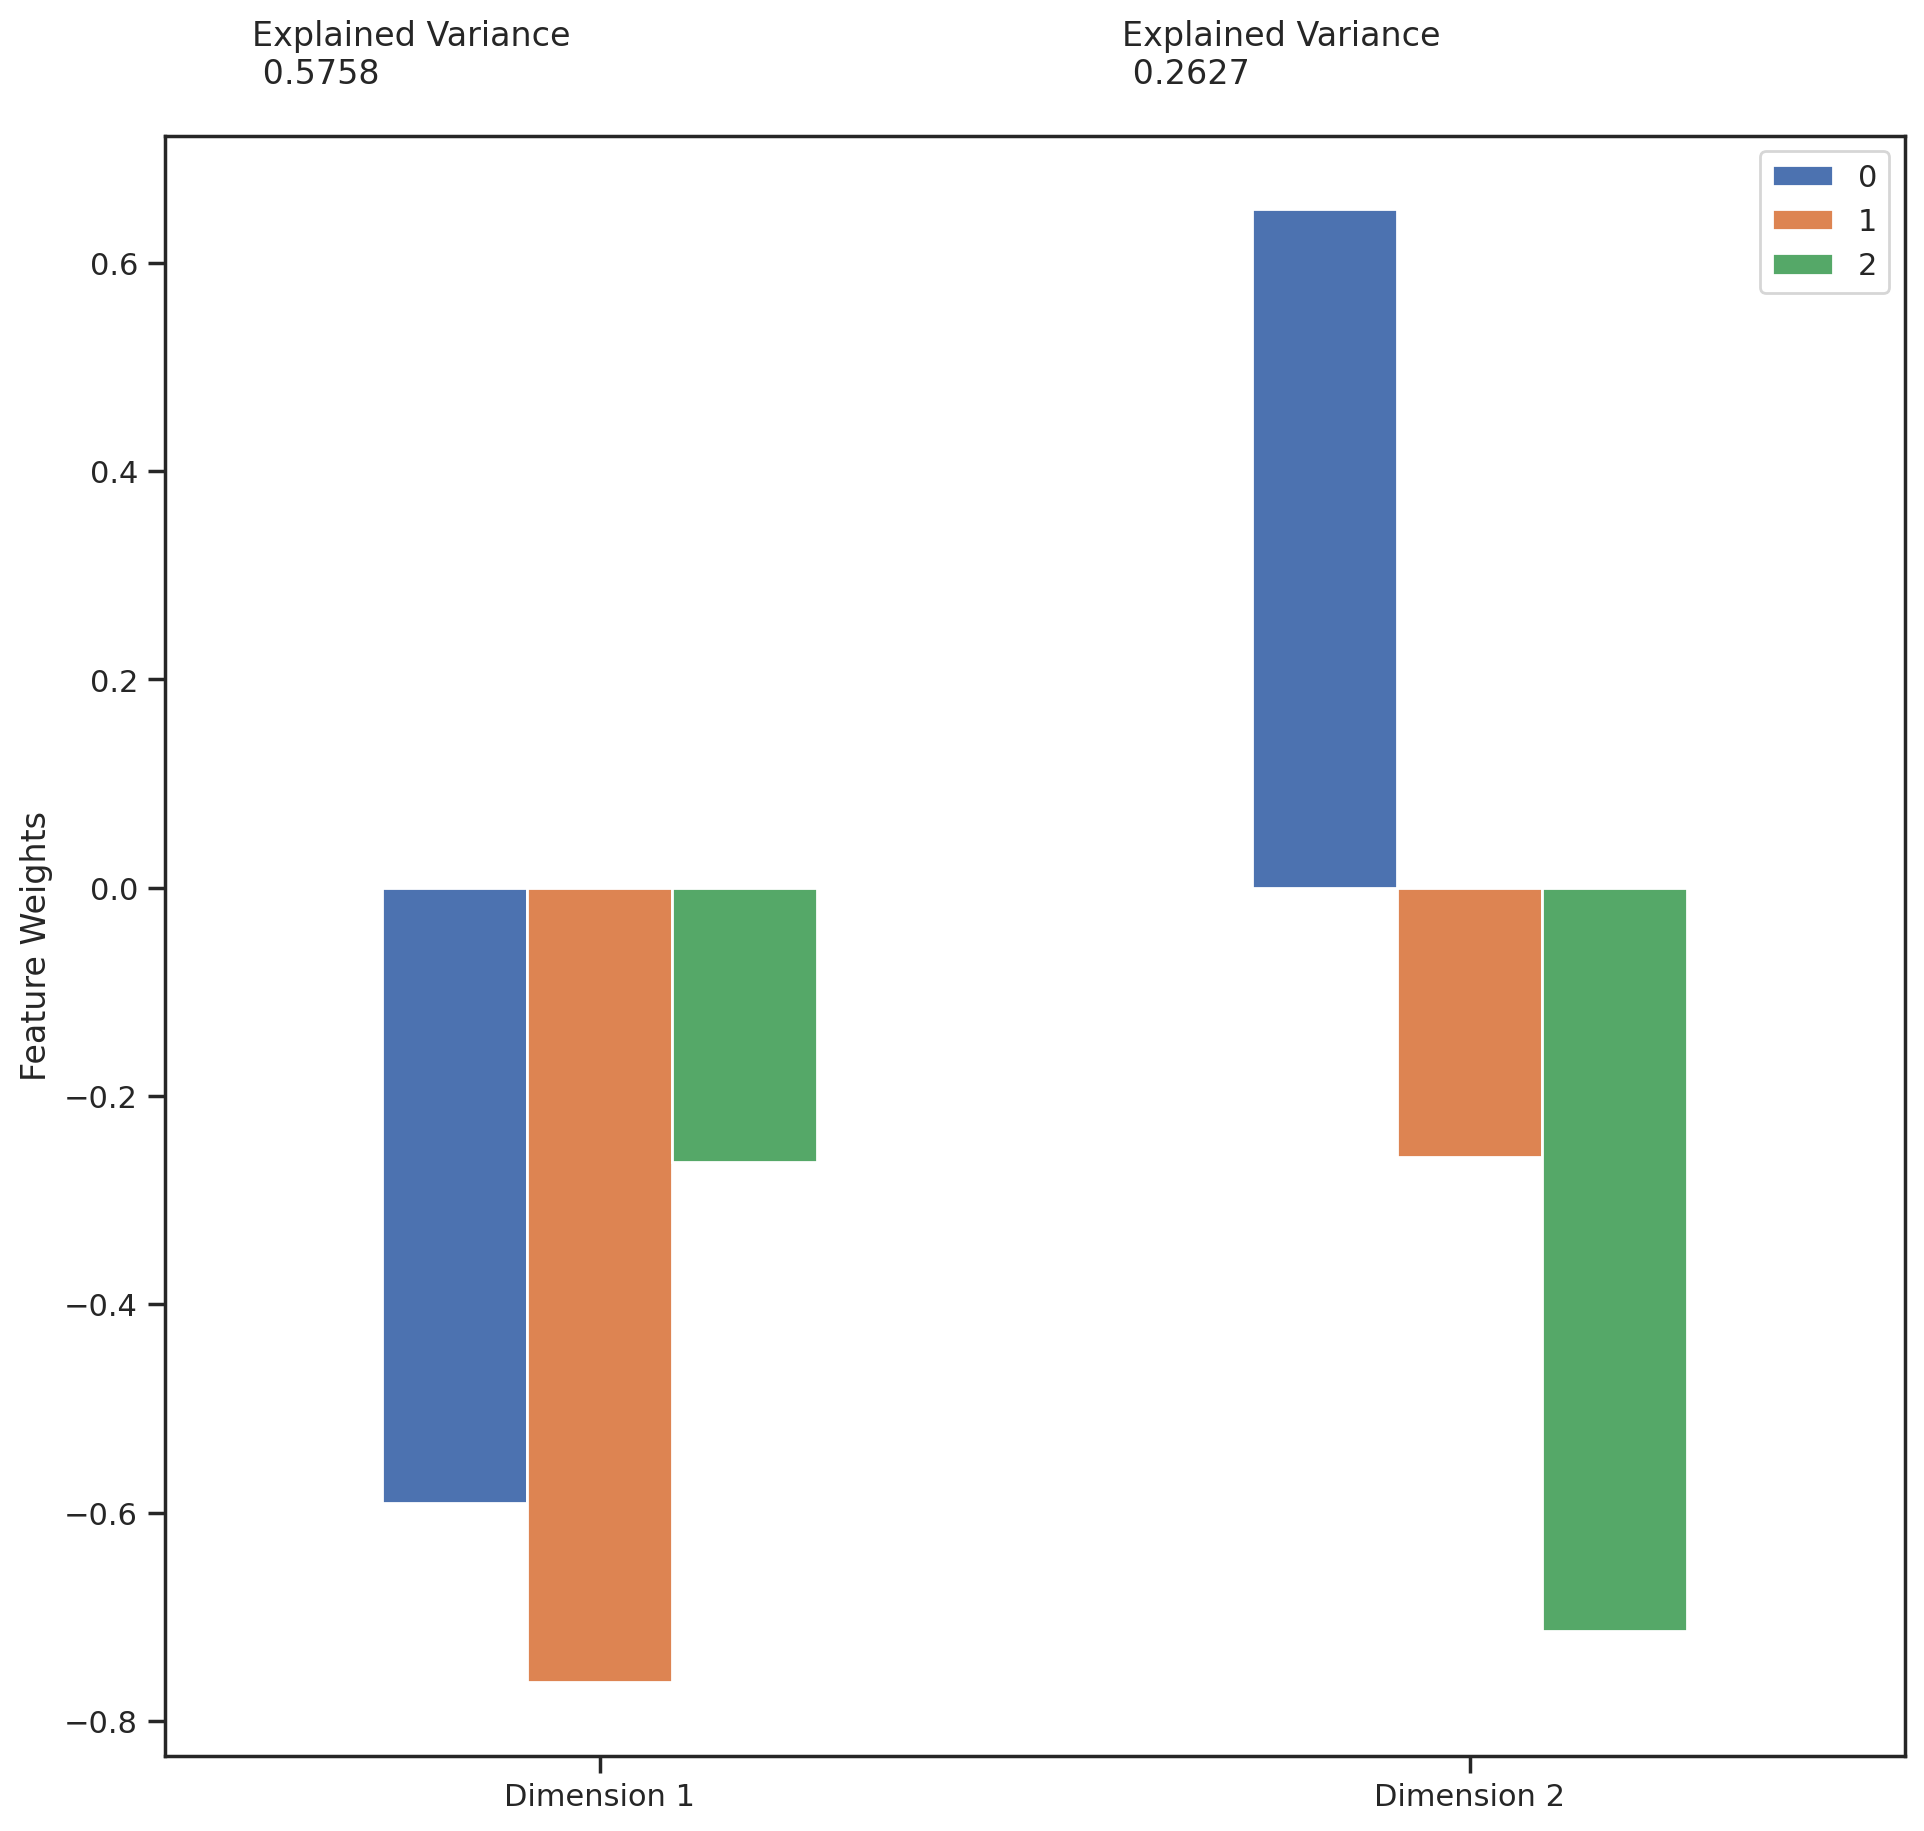

In [ ]:
correlations = pd.DataFrame(data=data_).corr()
pca_results(correlations, pca)

In [ ]:
#Choosing the three clusters based on the elbow curve
best_num_cluster__ = 3
km__ = KMeans(n_clusters=best_num_cluster__, random_state=seed)
km__.fit(reduced_data)
km__.predict(reduced_data)
labels__1 = km__.labels_

#Choosing the four clusters based on the elbow curve
best_num_cluster = 4
km = KMeans(n_clusters=best_num_cluster, random_state=seed)
km.fit(reduced_data)
km.predict(reduced_data)
labels = km.labels_

#Choosing the five clusters based on the elbow curve
best_num_cluster_ = 5
km_ = KMeans(n_clusters=best_num_cluster_, random_state=seed)
km_.fit(reduced_data)
km_.predict(reduced_data)
labels_1 = km_.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<ipython-input-45-68db92666e3c>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c=labels__1.astype(np.float), edgecolor="k", s=16)


Text(0.5, 1.0, 'Clusters based on K means: 3 clusters')

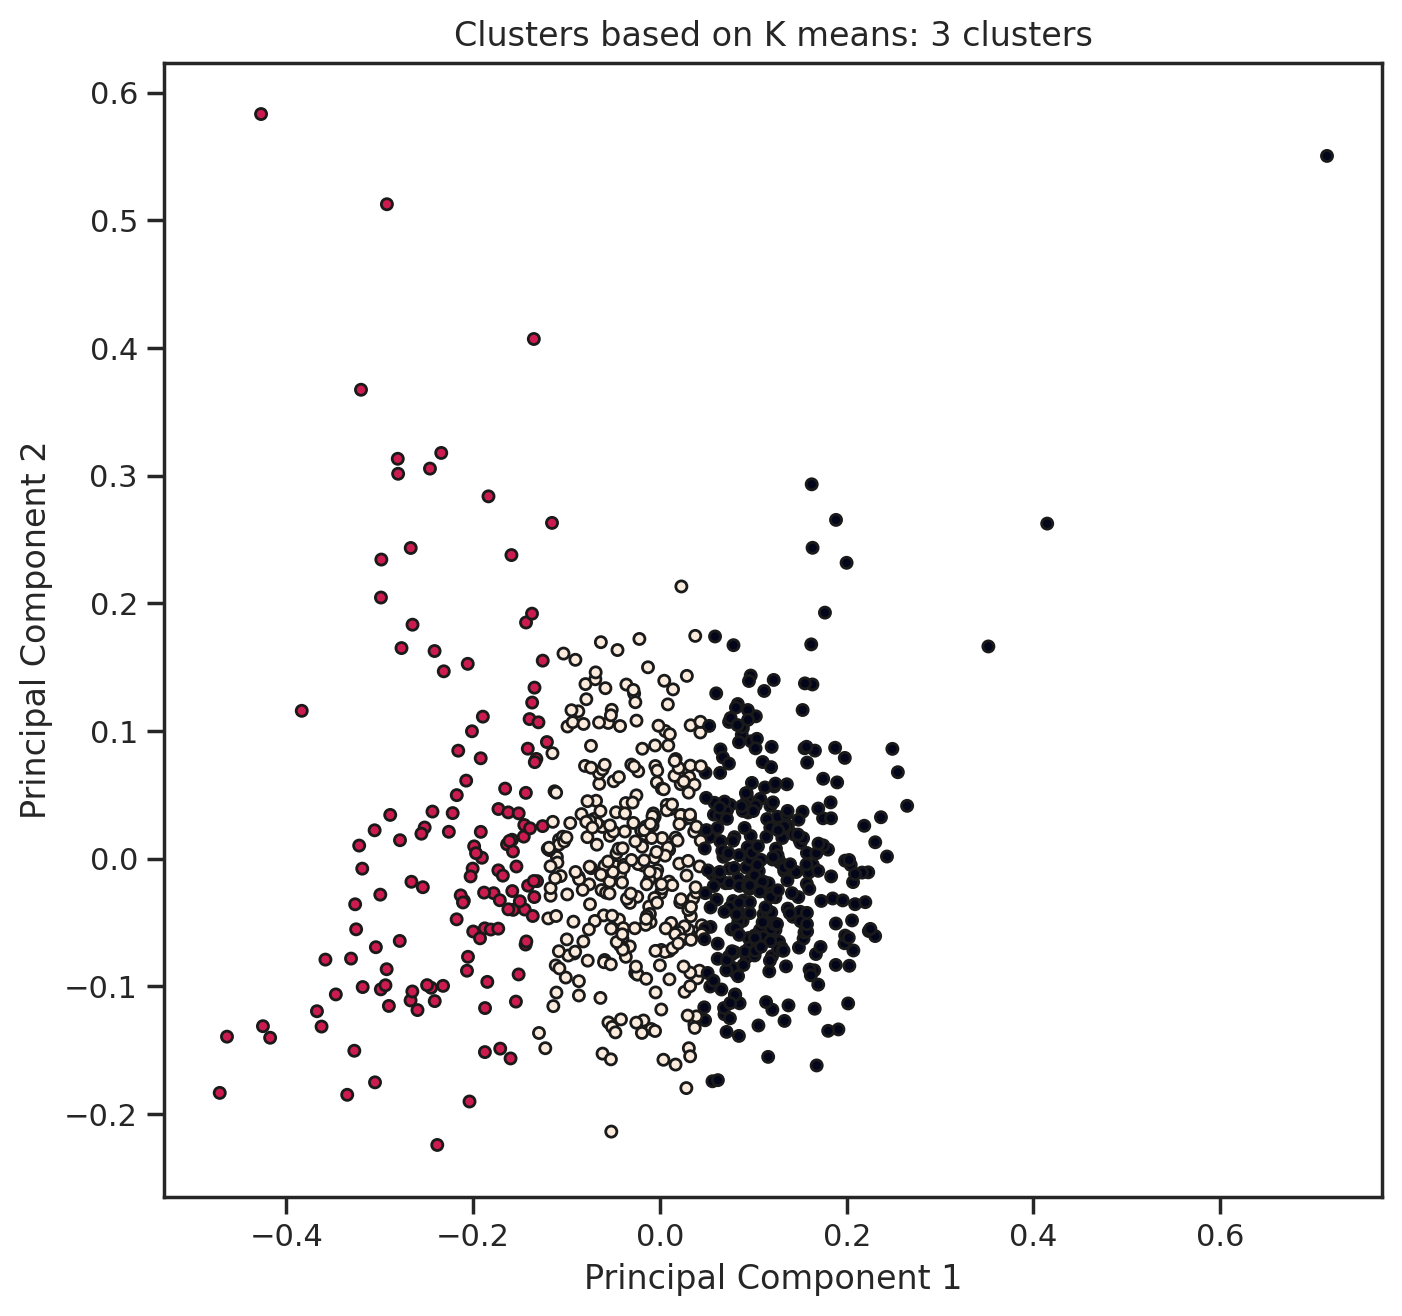

In [ ]:
#Plotting based on three cluster
fig = plt.figure(1, figsize=(7,7))
plt.scatter(reduced_data.iloc[:,0], reduced_data.iloc[:,1],
            c=labels__1.astype(np.float), edgecolor="k", s=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters based on K means: 3 clusters')

<ipython-input-46-42c511faf278>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c=labels.astype(np.float), edgecolor="k", s=16)


Text(0.5, 1.0, 'Clusters based on K means: 4 clusters')

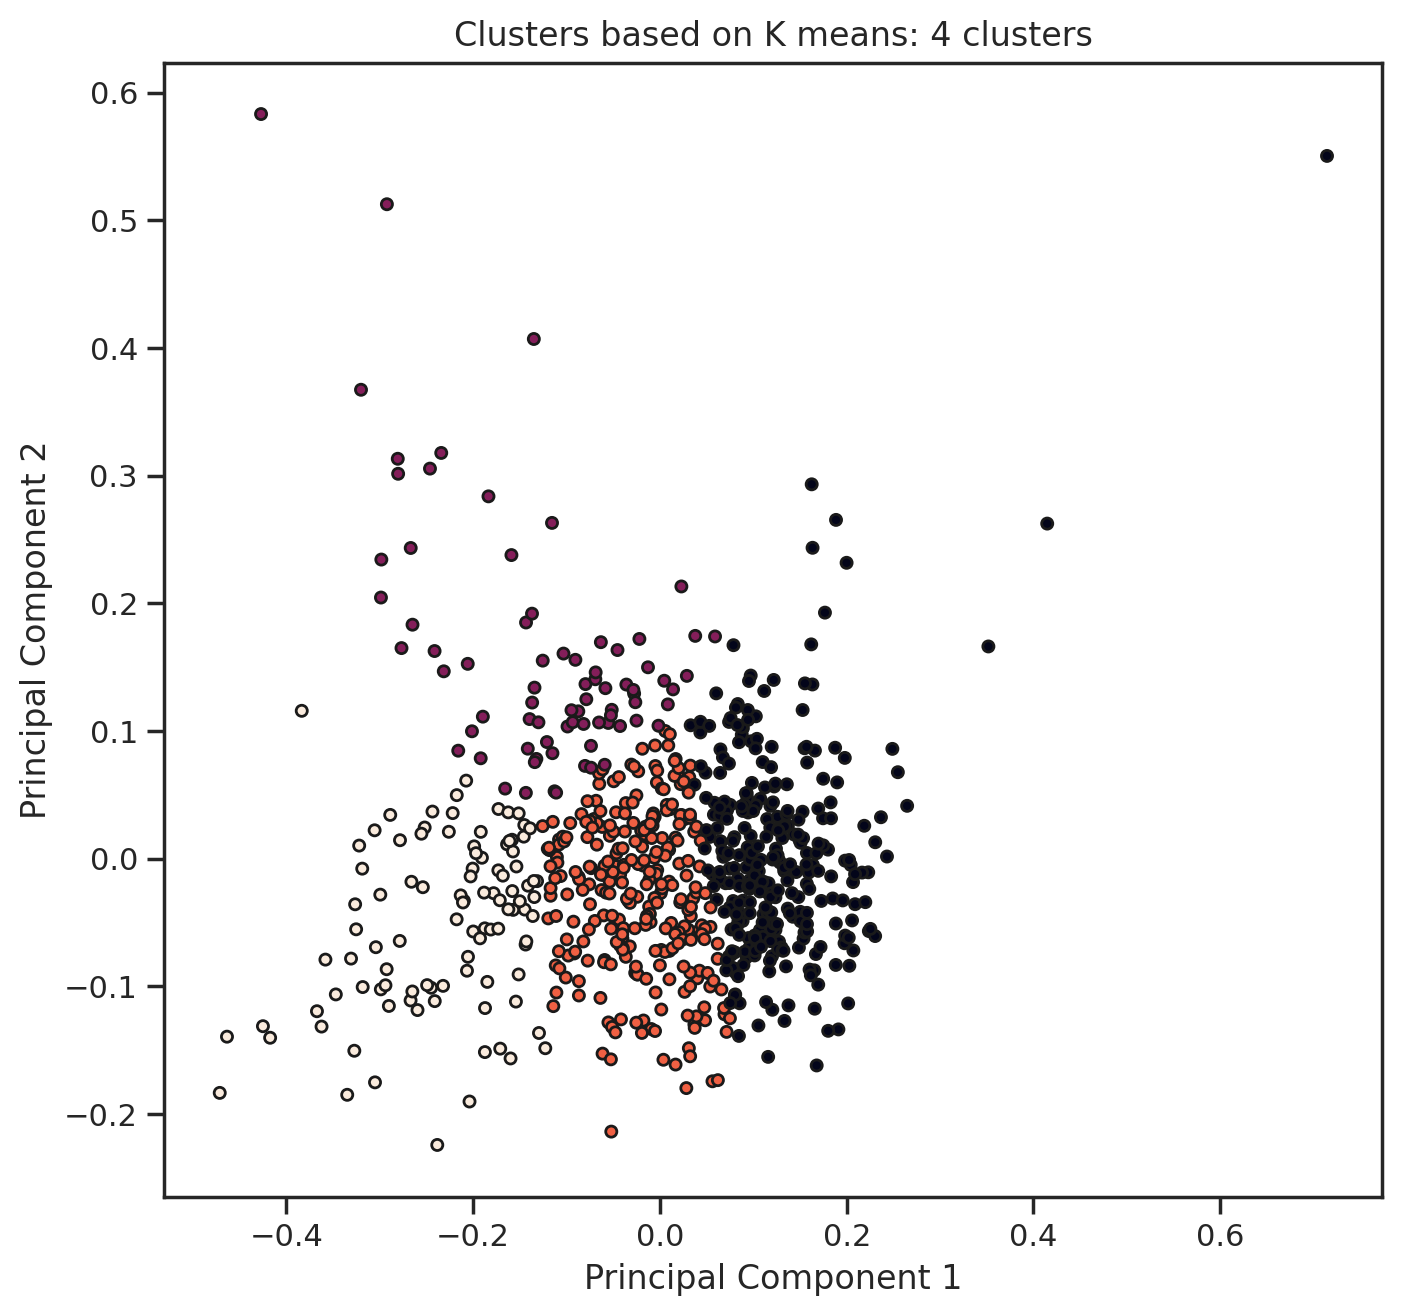

In [ ]:
#Plotting based on four cluster
fig = plt.figure(1, figsize=(7,7))
plt.scatter(reduced_data.iloc[:,0], reduced_data.iloc[:,1],
            c=labels.astype(np.float), edgecolor="k", s=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters based on K means: 4 clusters')

<ipython-input-47-48781c436c27>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c=labels_1.astype(np.float), edgecolor="k", s=16)


Text(0.5, 1.0, 'Clusters based on K means: 5 clusters')

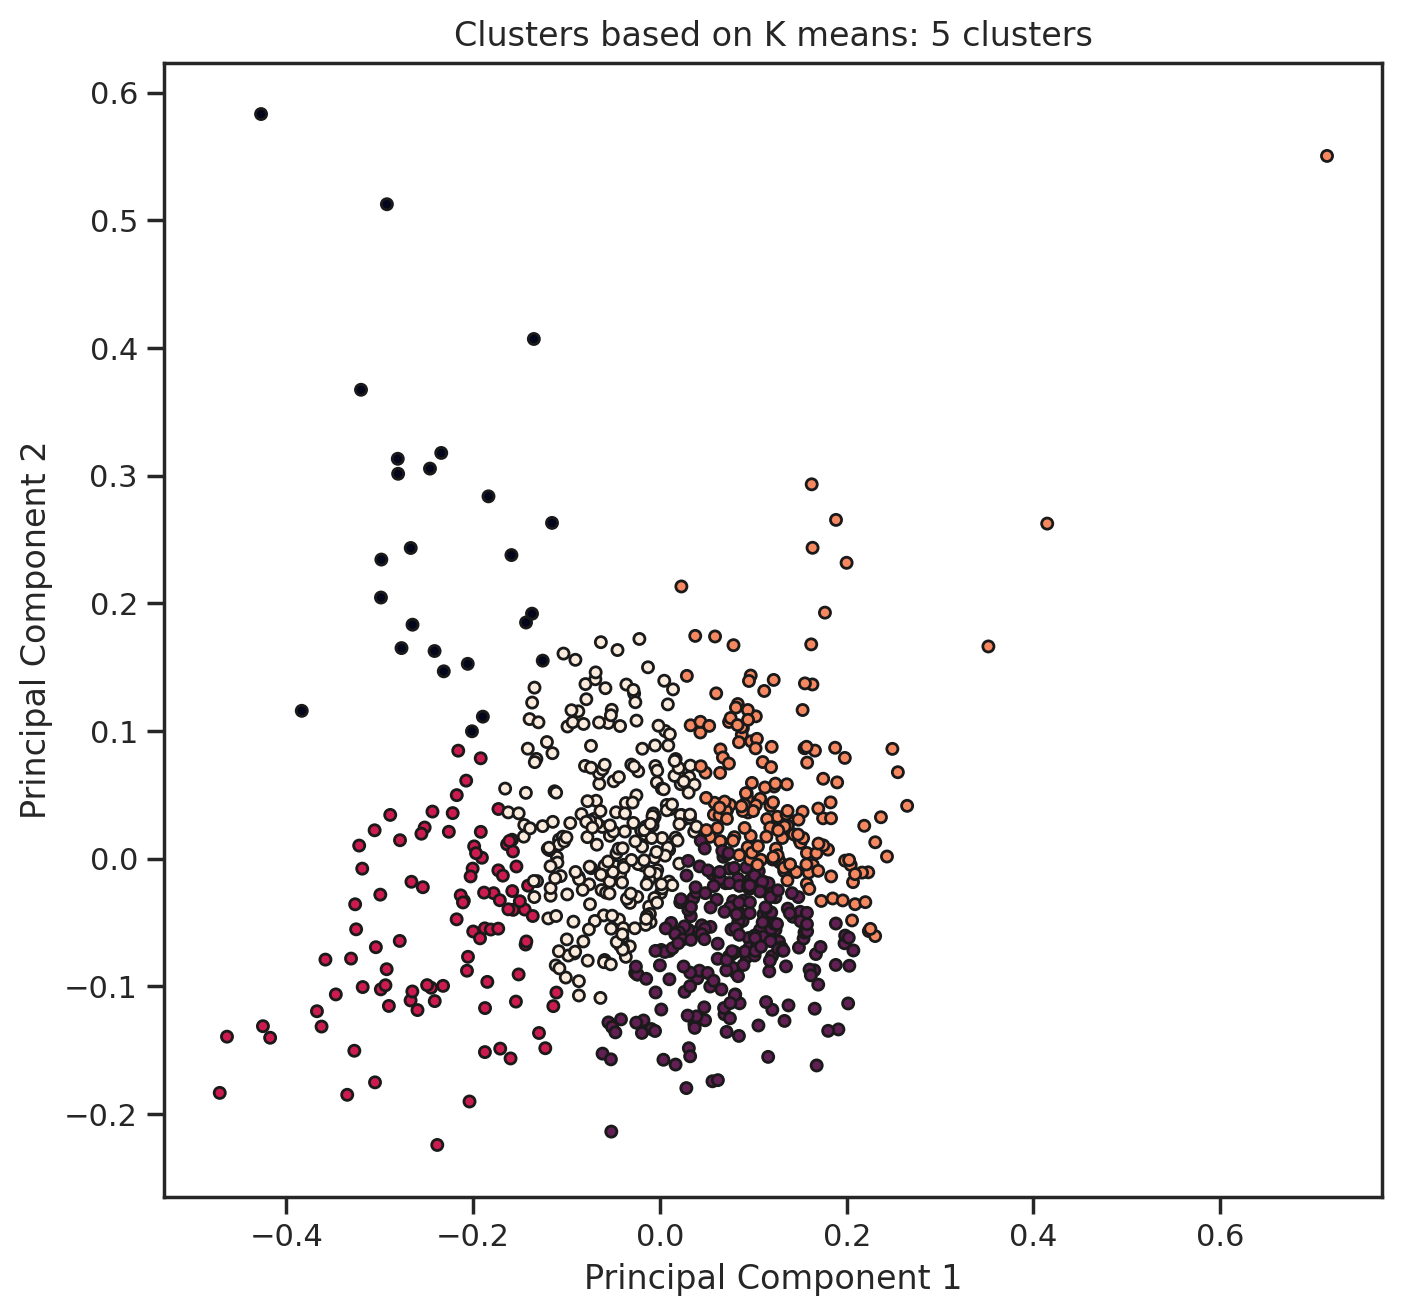

In [ ]:
#Plotting based on five cluster
fig = plt.figure(1, figsize=(7,7))
plt.scatter(reduced_data.iloc[:,0], reduced_data.iloc[:,1],
            c=labels_1.astype(np.float), edgecolor="k", s=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters based on K means: 5 clusters')

In [ ]:
reduced_data.loc[0]
mod = kmeans[best_num_cluster-1]
mod.cluster_centers_

array([[ 0.12529879,  0.00246339],
       [-0.12145458,  0.15931451],
       [-0.02185515, -0.02819207],
       [-0.22935551, -0.0521181 ]])

In [ ]:
reduced_data['Principal Component 1'] = reduced_data[0]
reduced_data['Principal Component 2'] = reduced_data[1]
reduced_data.drop(columns = [0, 1], inplace=True)
reduced_data.head()

Principal Component 1  Principal Component 2
0               0.061595               0.023953
1               0.056037              -0.011928
2               0.078372              -0.033201
3               0.098505               0.059304
4               0.008486               0.120800

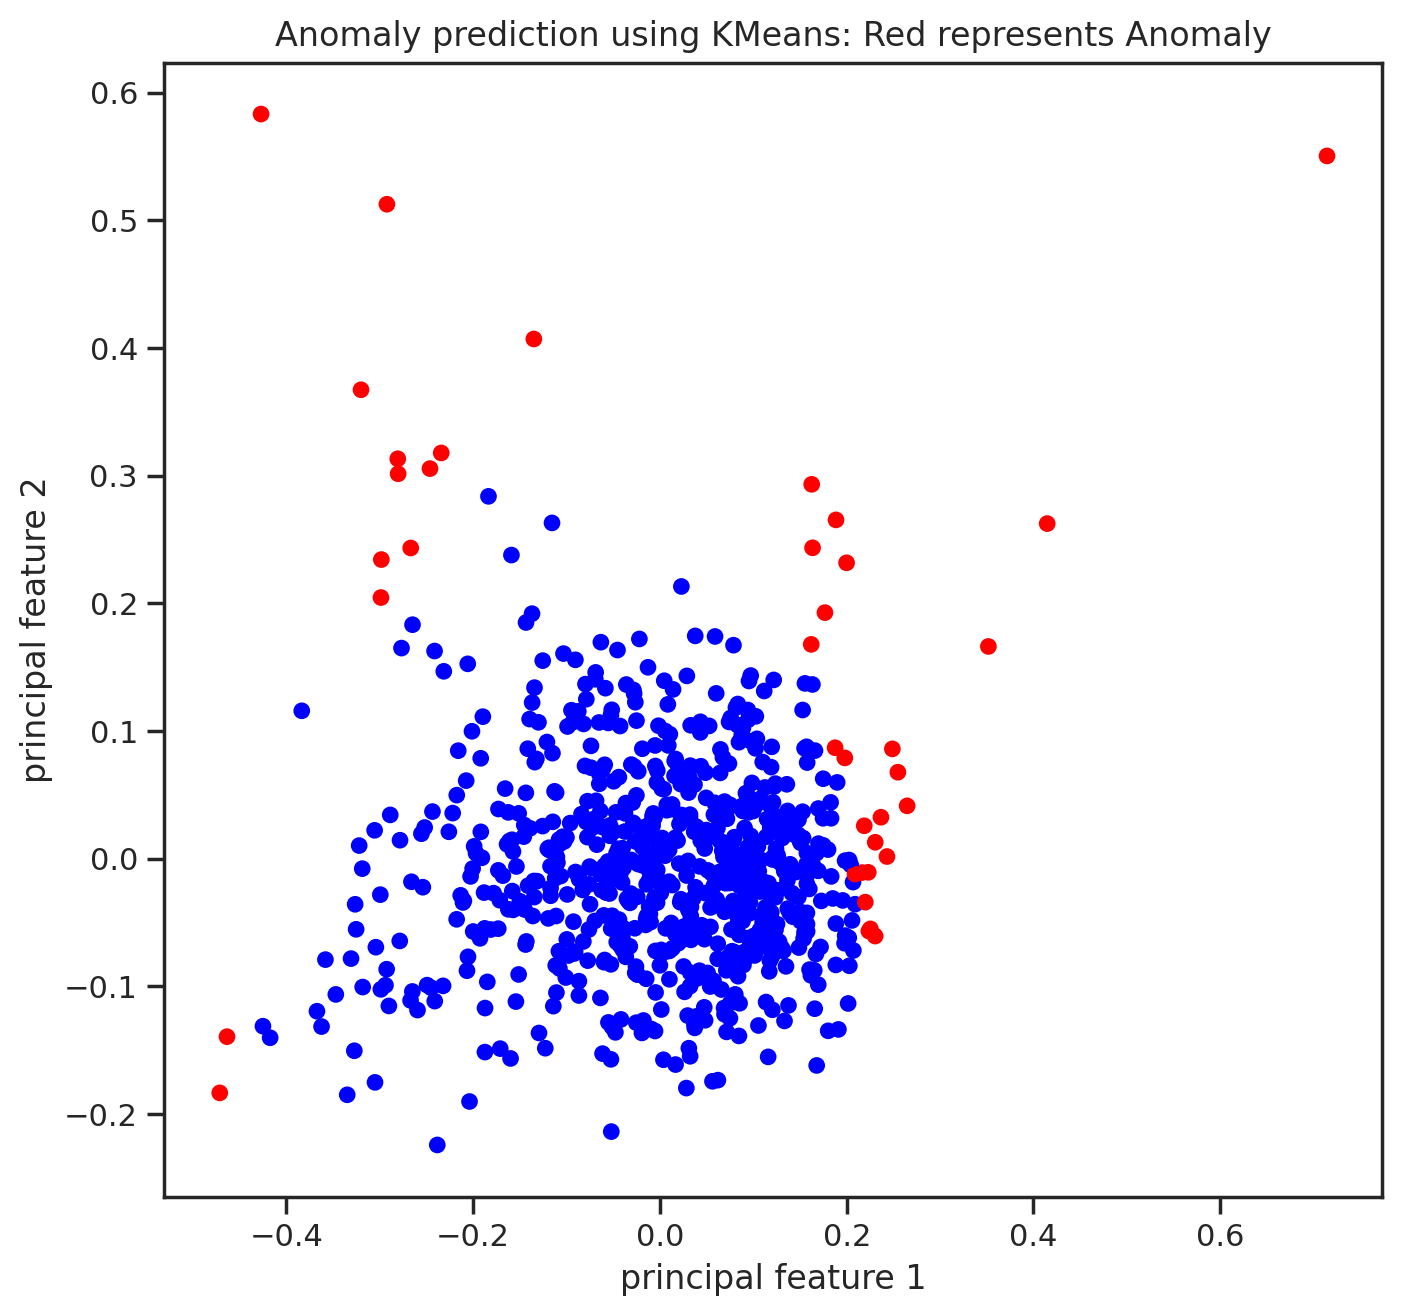

In [ ]:
def getDistanceByPoint(data, model):
    distance = []
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.append(np.linalg.norm(Xa-Xb))
    return distance

outliers_fraction = 0.05
# find the distance between each point and its nearest centroid. The largest distances will be consdiered anomalies
distance = getDistanceByPoint(reduced_data, kmeans[best_num_cluster-1])
distance = pd.Series(distance)
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()


# anomaly_kmeans contain the anomaly result of the above method  (0:normal, 1:anomaly)
result['anomaly_kmeans'] = (distance >= threshold).astype(int)

# visualisation of anomaly with cluster view
#fig, ax = plt.subplots(figsize=(10,6))
colors = {0:'blue', 1:'red'}
#colors = {1:'#f70505', 0:'#0a48f5'}
plt.figure(figsize=(7,7))
plt.scatter(reduced_data.iloc[:,0], reduced_data.iloc[:,1],
            c=result["anomaly_kmeans"].apply(lambda x: colors[x]), s=25)
plt.xlabel('principal feature 1')
plt.ylabel('principal feature 2')
plt.title('Anomaly prediction using KMeans: Red represents Anomaly')
plt.savefig('KMeans_anomaly.png', dpi=1000)

In [ ]:
result['anomaly_kmeans'].value_counts()

0    722
1     38
Name: anomaly_kmeans, dtype: int64

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

#anomaly
a = result.loc[result['anomaly_kmeans'] == 1]
ax.plot(result['Transactions'], color='black', label = 'Normal', linewidth=1.5)
ax.scatter(a.index ,a['Transactions'], color='red', label = 'Anomaly', s=16)
plt.legend()
plt.title("Anamoly Detection Using Kmeans")
plt.xlabel('Date')
plt.ylabel('Transactions')
plt.savefig('KMeans_anomaly_Transactions.png', dpi=1000)
plt.show();

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

#anomaly
a = result.loc[result['anomaly_kmeans'] == 1]
ax.plot(result['Blocks'], color='black', label = 'Normal', linewidth=1.5)
ax.scatter(a.index ,a['Blocks'], color='red', label = 'Anomaly', s=16)
plt.legend()
plt.title("Anamoly Detection Using Kmeans")
plt.xlabel('Date')
plt.ylabel('Blocks')
plt.savefig('KMeans_anomaly_Blocks.png', dpi=1000)
plt.show();

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

#anomaly
a = result.loc[result['anomaly_kmeans'] == 1]
ax.plot(result['Output_Satoshis'], color='black', label = 'Normal', linewidth=1.5)
ax.scatter(a.index ,a['Output_Satoshis'], color='red', label = 'Anomaly', s=16)
plt.legend()
plt.title("Anamoly Detection Using Kmeans")
plt.xlabel('Date')
plt.ylabel('Sum of Output Satoshis')
plt.savefig('KMeans_anomaly_Output_Satoshis.png', dpi=1000)
plt.show();

In [ ]:
# final result dataframe
result.head()

Date  Transactions  Blocks  Output_Satoshis  anomaly_IsolationForest  \
0 2016-08-12           149  571788     1.924492e+06                        0   
1 2016-08-13           163  537632     2.049093e+06                        0   
2 2016-08-14           163  533825     1.716569e+06                        0   
3 2016-08-15           146  502906     2.077130e+06                        0   
4 2016-08-16           135  610164     2.731958e+06                        0   

   anomaly_kmeans  
0               0  
1               0  
2               0  
3               0  
4               0

In [ ]:
# select the cases for final anomaly in which both the algorithms predicted anomaly
final_anomaly = result.query('anomaly_kmeans == 1 & anomaly_IsolationForest == 1')
final_anomaly.head()

Date  Transactions  Blocks  Output_Satoshis  \
83  2016-11-03           155  636913     6.817503e+06   
84  2016-11-04           116  575853     5.890890e+06   
219 2017-03-19           165  690161     6.345239e+06   
221 2017-03-21           142  725839     6.200928e+06   
238 2017-04-07           162  742041     5.893220e+06   

     anomaly_IsolationForest  anomaly_kmeans  
83                         1               1  
84                         1               1  
219                        1               1  
221                        1               1  
238                        1               1

In [ ]:
# Select the cases in which either of the two algorithms predicted anomaly
possible_anomaly = result.query('anomaly_kmeans == 1 | anomaly_IsolationForest == 1')
possible_anomaly.head()

Date  Transactions  Blocks  Output_Satoshis  \
22  2016-09-03           126  476950     1.308425e+06   
83  2016-11-03           155  636913     6.817503e+06   
84  2016-11-04           116  575853     5.890890e+06   
85  2016-11-05           147  595439     5.803606e+06   
173 2017-02-01           192  896356     2.078949e+06   

     anomaly_IsolationForest  anomaly_kmeans  
22                         0               1  
83                         1               1  
84                         1               1  
85                         1               0  
173                        1               0

In [ ]:
# Select the cases where no algorithm predicted anomaly
no_anomaly = result.query('anomaly_kmeans == 0 & anomaly_IsolationForest == 0')
no_anomaly.head()

Date  Transactions  Blocks  Output_Satoshis  anomaly_IsolationForest  \
0 2016-08-12           149  571788     1.924492e+06                        0   
1 2016-08-13           163  537632     2.049093e+06                        0   
2 2016-08-14           163  533825     1.716569e+06                        0   
3 2016-08-15           146  502906     2.077130e+06                        0   
4 2016-08-16           135  610164     2.731958e+06                        0   

   anomaly_kmeans  
0               0  
1               0  
2               0  
3               0  
4               0

In [ ]:
total_anomaly = len(final_anomaly)+len(possible_anomaly)
percent_total_anomaly = total_anomaly*100/len(result)
print('Total records:',len(result))
print('Number of final anomaly:', len(final_anomaly))
print('Number of possible anomaly:', len(possible_anomaly))
print('Total anomaly:', total_anomaly)
print('Percentage of total anomaly in the data: %0.2f' % percent_total_anomaly)

Total records: 760
Number of final anomaly: 19
Number of possible anomaly: 57
Total anomaly: 76
Percentage of total anomaly in the data: 10.00
